In [6]:
import os
import warnings


ch = os.path.dirname(os.getcwd())

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")
import seaborn as sns

sns.set(palette='pastel', style="white")
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

plt.rcParams['axes.grid'] = False
# display 4 
# decimal places
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.width', 12)
pd.set_option('display.max_colwidth', 12)
pd.set_option('display.expand_frame_repr', False)

pd.set_option('display.precision', 6)
plt.rcParams['axes.grid'] = False
#deasonal and trend
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


# time series decomposition
def plot_decomposition(df, col, freq):
    # multiplicative decomposition
    result_mul = seasonal_decompose(df[col], model='multiplicative', extrapolate_trend='freq')
    # Additive Decomposition
    result_add = seasonal_decompose(df[col], model='additive', extrapolate_trend='freq')
    # Plot
    plt.rcParams.update({'figure.figsize': (12, 5)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=10)
    result_add.plot().suptitle('Additive Decompose', fontsize=10)
    plt.show()

def show_performance(y_true, y_pred, model="TimeSeries"):
    # model name later used as the column name to aggrae the performance
    name = model
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    # data frame to store the performance
    df_performance = pd.DataFrame([[name, mae, mse, rmse, r2]], columns=['model', 'mae', 'mse', 'rmse', 'r2'])
    return df_performance

import matplotlib.dates as mdates
# plot the predictions
def show_predictions(modelname):
    # model diagnostics
    try:
        model.plot_diagnostics(figsize=(16, 8))
        plt.show()
    except:
        print("{} model does not have plot_diagnostics method".format(modelname))

    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    plt.suptitle(modelname, fontsize=15)
    display(df_test_ne.head(5))
    fig.subplots_adjust(wspace=0.1)
    ax[0].plot(df_train_ne['date'], df_train_ne['confirmed'], label='Train')
    ax[0].plot(df_test_ne['date'], df_test_ne['confirmed'], label='Test')
    ax[0].plot(df_test_ne['date'], df_test_ne['Predictions'], label='Predictions')
    ax[0].set_title(f'Prediction ({modelname})')
    ax[0].set_xlabel('Date')
    ax[1].set_ylabel('# Confirmed Cases')
    ax[0].legend()
    # plot 2 only predictions
    ax[1].plot(df_test_ne['date'], df_test_ne['confirmed'], label='Test')
    ax[1].plot(df_test_ne['date'], df_test_ne['Predictions'], label='Predictions')
    ax[1].set_title('Prediction on Test Only')
    ax[1].xaxis.set_major_locator(plt.MultipleLocator(7))
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('# Confirmed Cases')
    # convert year-month-day to month-day
    
    ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    ax[1].set_ylabel('')
    ax[1].legend()
    plt.show()

In [7]:
path = ''
df_train_ne = pd.read_csv(path + 'ne_train.csv', index_col=0).iloc[39:, :]
df_test_ne = pd.read_csv(path + 'ne_test.csv', index_col=0)
df_train_ne.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ne_train.csv'

In [4]:
df_train_ne['date'] = pd.to_datetime(df_train_ne.date)
df_test_ne['date'] = pd.to_datetime(df_test_ne.date)
print(df_train_ne.shape)
print(df_test_ne.shape)
df_all_ne = pd.concat([df_train_ne[['date', 'confirmed']], df_test_ne[['date', 'confirmed']]])

(152, 29)
(48, 29)


In [5]:
pd.to_datetime(df_train_ne.date)

39    2020-03-01
40    2020-03-02
41    2020-03-03
42    2020-03-04
43    2020-03-05
         ...    
186   2020-07-26
187   2020-07-27
188   2020-07-28
189   2020-07-29
190   2020-07-30
Name: date, Length: 152, dtype: datetime64[ns]

In [6]:
df_train_ne['confirmed']

39       1.0000
40       3.0000
41       3.0000
42       9.0000
43      14.0000
         ...   
186   2226.0000
187   2403.0000
188   2562.0000
189   3666.0000
190   2464.0000
Name: confirmed, Length: 152, dtype: float64

For all we start form the first non-zero day.

## C. Prophet (Univariate) Model

In [1]:





#df_all_ne['date'] = pd.to_datetime(df_1301['Date'])
df_all_ne['DayOfWeek'] = df_all_ne['date'].dt.dayofweek.astype(int)
df_all_ne['DayOfMonth'] = df_all_ne['date'].dt.day.astype(int)
df_all_ne['DayOfYear'] = df_all_ne['date'].dt.dayofyear.astype(int)
df_all_ne['WeekOfYear'] = df_all_ne['date'].dt.isocalendar().week.astype(int)
df_all_ne['Month'] = df_all_ne['date'].dt.month.astype(int)
df_all_ne['Year'] = df_all_ne['date'].dt.year.astype(int)

# 滞后特征
for lag in range(1, 6):
    df_all_ne[f'lag_{lag}'] = df_all_ne['confirmed'].shift(lag)

# 滑动窗口统计量
df_all_ne['rolling_mean_7'] = df_all_ne['confirmed'].rolling(window=7).mean()
df_all_ne['rolling_max_7'] = df_all_ne['confirmed'].rolling(window=7).max()
df_all_ne['rolling_min_7'] = df_all_ne['confirmed'].rolling(window=7).min()
df_all_ne['rolling_mean_30'] = df_all_ne['confirmed'].rolling(window=30).mean()
df_all_ne['rolling_max_30'] = df_all_ne['confirmed'].rolling(window=30).max()
df_all_ne['rolling_min_30'] = df_all_ne['confirmed'].rolling(window=30).min()

df_all_ne.dropna(inplace=True)

train = df_all_ne.iloc[:-48, :]
test = df_all_ne.iloc[-48:, :]

X_train = train.drop(['date', 'confirmed'], axis=1)
y_train = train['confirmed']
X_test = test.drop(['date', 'confirmed'], axis=1)

X_train.head()

NameError: name 'df_all_ne' is not defined

In [8]:
df_test_ne['Predictions'] = forecast['yhat'].tail(len(df_test_ne)).values

Prophet Univariate model does not have plot_diagnostics method


,date,daily_state_test,precipitation,temperature,total_population,female_percent,area,population_density,latitude,longitude,...,passenger_load_ratio,meat_plants,median_household_income,percent_insured,gdp_per_capita,immigrant_student_ratio,weekend,confirmed,death,Predictions
0,2020-07-31,1.7296,0.4544,1.2957,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.6278,3056.0000,-0.0000,3497.9335
1,2020-08-01,1.6165,-0.5741,1.2906,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,1.5928,2495.0000,-0.0000,3312.6121
2,2020-08-02,1.3099,0.2383,1.4505,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,1.5928,1949.0000,-0.0000,2208.3194
3,2020-08-03,1.0575,-0.1046,1.4905,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.6278,1999.0000,-0.0000,2222.9339
4,2020-08-04,1.3862,1.6186,1.3582,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.6278,2093.0000,-0.0000,2012.0776


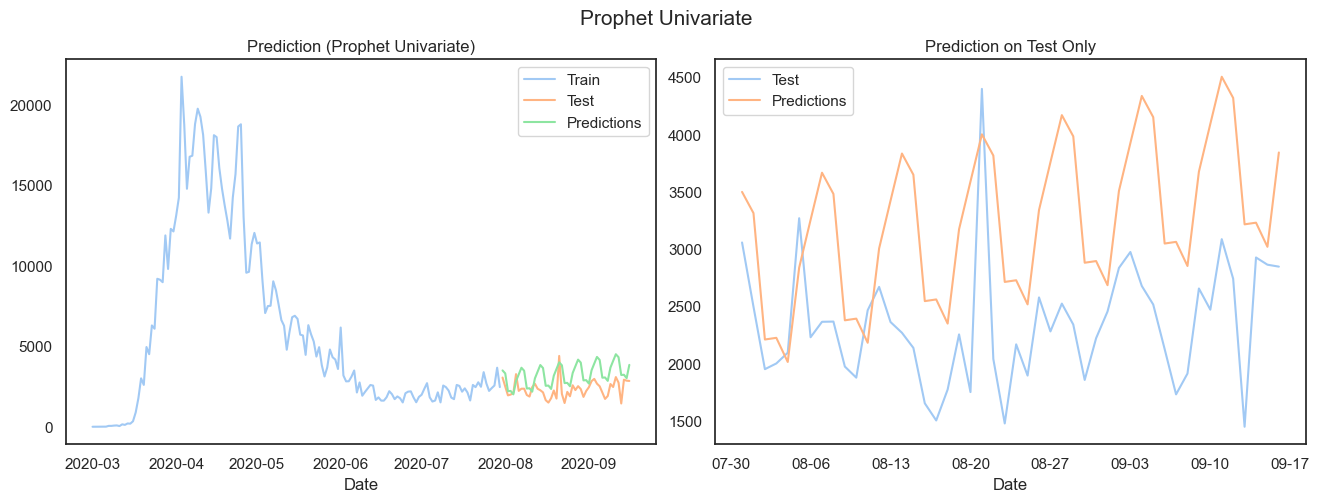

In [9]:
show_predictions('Prophet Univariate')

Prophet Univariate model does not have plot_diagnostics method


,date,daily_state_test,precipitation,temperature,total_population,female_percent,area,population_density,latitude,longitude,...,passenger_load_ratio,meat_plants,median_household_income,percent_insured,gdp_per_capita,immigrant_student_ratio,weekend,confirmed,death,Predictions
0,2020-07-31,1.7296,0.4544,1.2957,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.6278,3056.0000,-0.0000,3497.9335
1,2020-08-01,1.6165,-0.5741,1.2906,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,1.5928,2495.0000,-0.0000,3312.6121
2,2020-08-02,1.3099,0.2383,1.4505,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,1.5928,1949.0000,-0.0000,2208.3194
3,2020-08-03,1.0575,-0.1046,1.4905,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.6278,1999.0000,-0.0000,2222.9339
4,2020-08-04,1.3862,1.6186,1.3582,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.6278,2093.0000,-0.0000,2012.0776


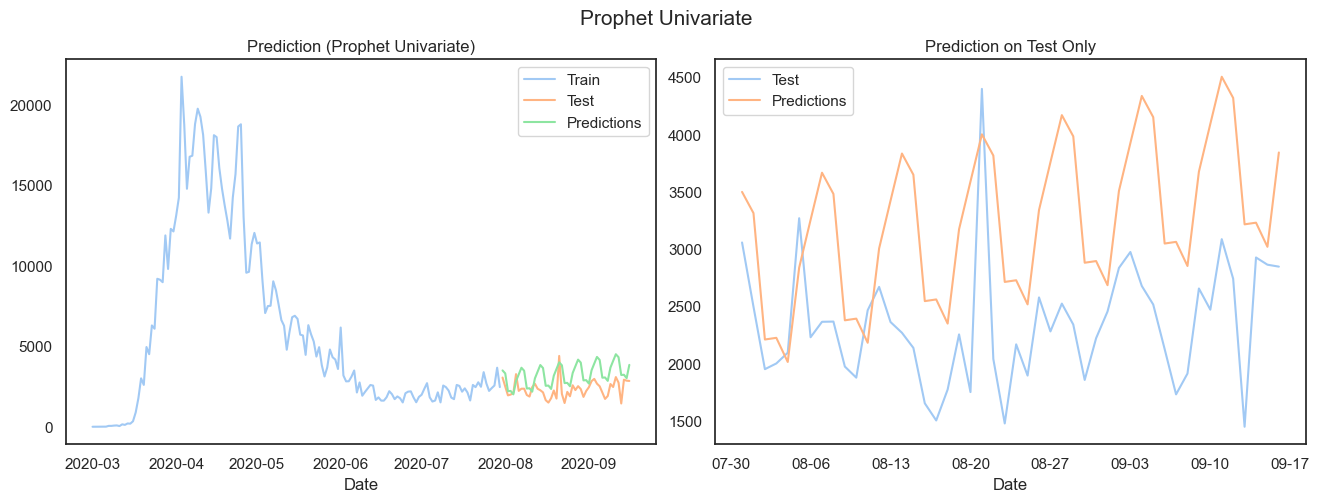

,model,mae,mse,rmse,r2
0,Prophet ...,952.1189,1169722.7093,1081.5372,-3.1065


In [10]:
forecast = predictions
show_predictions('Prophet Univariate')
prop_u = show_performance(df_test_ne['confirmed'], predictions, "Prophet Univariate")
prop_u

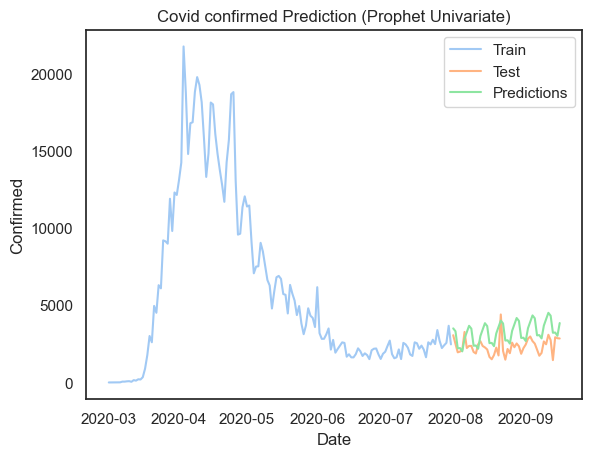

In [11]:

plt.plot(df_train_ne['date'], df_train_ne['confirmed'], label='Train')
plt.plot(df_test_ne['date'], df_test_ne['confirmed'], label='Test')
plt.plot(df_test_ne['date'], df_test_ne['Predictions'], label='Predictions')
plt.title('Covid confirmed Prediction (Prophet Univariate)')
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.legend()
plt.show()



In [12]:
uni_p = show_performance(df_test_ne['confirmed'], forecast, "Prophet Univariate")

In [13]:
uni_p

,model,mae,mse,rmse,r2
0,Prophet ...,952.1189,1169722.7093,1081.5372,-3.1065


## Prophet (Multivariate) Model


In [14]:
# all features
df_train_ne = pd.read_csv(path + 'ne_train.csv', index_col=0).iloc[39:, :]
# all feature naeme 
df_train_ne.columns

Index(['date',
       'daily_state_test',
       'precipitation',
       'temperature',
       'total_population',
       'female_percent',
       'area',
       'population_density',
       'latitude',
       'longitude',
       'hospital_beds_ratio',
       'ventilator_capacity_ratio',
       'icu_beds_ratio',
       'houses_density',
       'less_than_high_school_diploma',
       'percent_smokers',
       'percent_diabetes',
       'Religious_congregation_ratio',
       'political_party',
       'airport_distance',
       'passenger_load_ratio',
       'meat_plants',
       'median_household_income',
       'percent_insured',
       'gdp_per_capita',
       'immigrant_student_ratio',
       'weekend',
       'confirmed',
       'death'],
      dtype='object')

In [15]:
df_train_ne['date'] = pd.to_datetime(df_train_ne.date)
df_test_ne['date'] = pd.to_datetime(df_test_ne.date)
print(df_train_ne.shape)
print(df_test_ne.shape)

(152, 29)
(48, 30)


In [16]:

df_Prop = df_train_ne.rename(columns={'date': 'ds', 'confirmed': 'y'})

model = Prophet(changepoint_prior_scale=0.3,
                yearly_seasonality=False,
                weekly_seasonality=True,
                daily_seasonality=False,
                seasonality_prior_scale=2.0,
                interval_width=0.95)

model.add_regressor('daily_state_test')
model.add_regressor('precipitation')
model.add_regressor('temperature')

model.fit(df_Prop)

future = model.make_future_dataframe(periods=48)

13:51:30 - cmdstanpy - INFO - Chain [1] start processing
13:51:30 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future

,ds
0,2020-03-01
1,2020-03-02
2,2020-03-03
3,2020-03-04
4,2020-03-05
...,...
195,2020-09-12
196,2020-09-13
197,2020-09-14
198,2020-09-15


In [18]:

variables = pd.concat([df_train_ne[['date', 'daily_state_test', 'precipitation', 'temperature']],
                       df_test_ne[['date', 'daily_state_test', 'precipitation', 'temperature']]])
variables.rename(columns={'date': 'ds', 'confirmed': 'y'}, inplace=True)
variables.head()

,ds,daily_state_test,precipitation,temperature
39,2020-03-01,-1.1878,-0.6853,-1.5469
40,2020-03-02,-1.1877,-0.6761,-1.2903
41,2020-03-03,-1.1874,-0.4916,-0.5324
42,2020-03-04,-1.1876,0.3569,-0.2444
43,2020-03-05,-1.1851,-0.6554,-0.5916


In [19]:


from sklearn.metrics import mean_absolute_error

df_Prop = df_train_ne.rename(columns={'date': 'ds', 'confirmed': 'y'})

model = Prophet(changepoint_prior_scale=0.3, 
                yearly_seasonality=False,
                weekly_seasonality=True,
                daily_seasonality=False, 
                seasonality_prior_scale=2.0, 
                interval_width=0.95) 

model.fit(df_Prop)

future = model.make_future_dataframe(periods=48)


13:51:30 - cmdstanpy - INFO - Chain [1] start processing
13:51:31 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# fine tune  Prophet  withcross validation
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='30 days', period='15 days', horizon = '7 days')
df_cv.head()

  0%|          | 0/8 [00:00<?, ?it/s]

13:51:31 - cmdstanpy - INFO - Chain [1] start processing
13:51:31 - cmdstanpy - INFO - Chain [1] done processing
13:51:31 - cmdstanpy - INFO - Chain [1] start processing
13:51:31 - cmdstanpy - INFO - Chain [1] done processing
13:51:31 - cmdstanpy - INFO - Chain [1] start processing
13:51:32 - cmdstanpy - INFO - Chain [1] done processing
13:51:32 - cmdstanpy - INFO - Chain [1] start processing
13:51:32 - cmdstanpy - INFO - Chain [1] done processing
13:51:33 - cmdstanpy - INFO - Chain [1] start processing
13:51:33 - cmdstanpy - INFO - Chain [1] done processing
13:51:33 - cmdstanpy - INFO - Chain [1] start processing
13:51:33 - cmdstanpy - INFO - Chain [1] done processing
13:51:33 - cmdstanpy - INFO - Chain [1] start processing
13:51:33 - cmdstanpy - INFO - Chain [1] done processing
13:51:33 - cmdstanpy - INFO - Chain [1] start processing
13:51:33 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-10,21847.6637,19692.0735,23969.4285,19243.0000,2020-04-09
1,2020-04-11,22610.4403,20364.2931,24637.2003,18124.0000,2020-04-09
2,2020-04-12,21726.7211,19369.2296,24003.4773,15802.0000,2020-04-09
3,2020-04-13,23072.5923,20806.2914,25263.6357,13295.0000,2020-04-09
4,2020-04-14,23382.8441,20911.3787,25701.6159,14806.0000,2020-04-09


In [21]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-10,21847.6637,19692.0735,23969.4285,19243.0000,2020-04-09
1,2020-04-11,22610.4403,20364.2931,24637.2003,18124.0000,2020-04-09
2,2020-04-12,21726.7211,19369.2296,24003.4773,15802.0000,2020-04-09
3,2020-04-13,23072.5923,20806.2914,25263.6357,13295.0000,2020-04-09
4,2020-04-14,23382.8441,20911.3787,25701.6159,14806.0000,2020-04-09
5,2020-04-15,24797.9018,22425.0436,27126.0743,18105.0000,2020-04-09
6,2020-04-16,25593.5852,23317.6917,27925.9888,17986.0000,2020-04-09
7,2020-04-25,14505.7105,12125.8419,17034.8033,18781.0000,2020-04-24
8,2020-04-26,12714.3369,10293.8169,15283.0229,13025.0000,2020-04-24
9,2020-04-27,12627.9560,10216.9770,14898.4212,9563.0000,2020-04-24


In [22]:
# get the best
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,3589304.1494,1894.5459,1348.8061,0.1975,0.2171,0.2218,0.7500
1,2 days,3086059.0885,1756.7183,1053.0908,0.1560,0.1581,0.1651,0.8750
2,3 days,5727489.0891,2393.2173,1406.3421,0.1836,0.1661,0.1755,0.7500
3,4 days,13209034....,3634.4235,2064.3680,0.2963,0.2534,0.2893,0.7500
4,5 days,10720793....,3274.2623,2007.3347,0.3471,0.3207,0.4549,0.8750
5,6 days,7349991.9786,2711.0869,1971.8508,0.4114,0.3569,0.6010,0.8750
6,7 days,10143125....,3184.8274,2378.0307,0.4773,0.3994,0.6183,0.8750


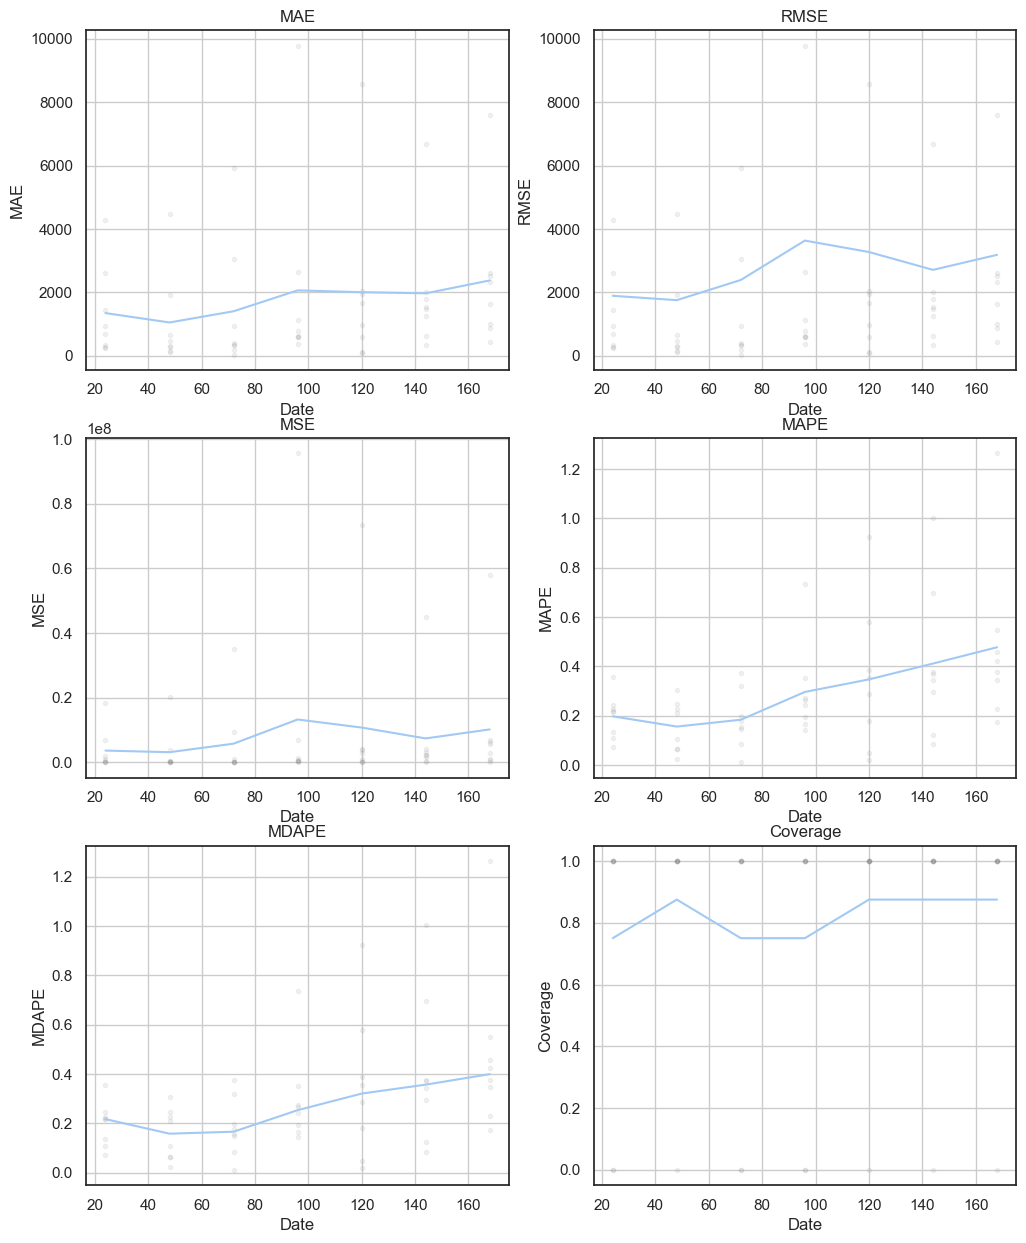

In [23]:
# plot the performance
from prophet.plot import plot_cross_validation_metric
# six subplots
fig, ax = plt.subplots(3, 2, figsize=(12, 15))
# plot 1
plot_cross_validation_metric(df_cv, metric='mae', ax=ax[0, 0])
ax[0, 0].set_title('MAE')
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('MAE')
# plot 2
plot_cross_validation_metric(df_cv, metric='rmse', ax=ax[0, 1])
ax[0, 1].set_title('RMSE')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('RMSE')
# plot 3
plot_cross_validation_metric(df_cv, metric='mse', ax=ax[1, 0])
ax[1, 0].set_title('MSE')
ax[1, 0].set_xlabel('Date')

ax[1, 0].set_ylabel('MSE')
# plot 4
plot_cross_validation_metric(df_cv, metric='mape', ax=ax[1, 1])
ax[1, 1].set_title('MAPE')
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('MAPE')
# plot 5
plot_cross_validation_metric(df_cv, metric='mdape', ax=ax[2, 0])
ax[2, 0].set_title('MDAPE')
ax[2, 0].set_xlabel('Date')
ax[2, 0].set_ylabel('MDAPE')
# plot 6
plot_cross_validation_metric(df_cv, metric='coverage', ax=ax[2, 1])
ax[2, 1].set_title('Coverage')
ax[2, 1].set_xlabel('Date')
ax[2, 1].set_ylabel('Coverage')
plt.show()

In [40]:
# fine tune  Prophet  
# runed parameters : changepoint_prior_scale, seasonality_prior_scale, interval_width，weekly_seasonality，daily_seasonality，yearly_seasonality，changepoint_range
cv_tuned =  pd.DataFrame(columns=['changepoint_prior_scale', 'seasonality_prior_scale', 'interval_width','weekly_seasonality','daily_seasonality','yearly_seasonality','changepoint_range','mae','rmse','mse','mape','mdape','coverage'])
# fine tune
"""
changepoint_prior_scale= [0.1,0.3, 0.5],
                yearly_seasonality=[False,True],
                weekly_seasonality=[False,True],
                daily_seasonality=[False,True],
                seasonality_prior_scale=[0.2,0.25, 0.5],
                interval_width=[0.9,0.95,0.99],
                changepoint_range=[0.8,0.9,0.95,0.99]
"""
# create cv for tuning
params = {'changepoint_prior_scale': [0.2, 0.3, 0.5],
                'yearly_seasonality':[False,True],
                'weekly_seasonality':[True],
                'daily_seasonality':[False,True],
                'seasonality_prior_scale':[1, 2,5,8],
                'interval_width':[0.9,0.95,0.99]}

# tune over params
model_search = Prophet()
#grid search  over params
from sklearn.model_selection import ParameterGrid
grid = ParameterGrid(params)
grid

for p in grid:
    model_search = Prophet(**p)
    model_search.add_regressor('daily_state_test')
    model_search.add_regressor('precipitation')
    model_search.add_regressor('temperature')
    model_search.fit(df_Prop)
    df_cv = cross_validation(model_search, initial='60 days', period='30 days', horizon = '7 days')
    df_p = performance_metrics(df_cv)
    # print best performance
    print(df_p.head(1))


13:58:06 - cmdstanpy - INFO - Chain [1] start processing
13:58:06 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:06 - cmdstanpy - INFO - Chain [1] start processing
13:58:08 - cmdstanpy - INFO - Chain [1] done processing
13:58:08 - cmdstanpy - INFO - Chain [1] start processing
13:58:08 - cmdstanpy - INFO - Chain [1] done processing
13:58:08 - cmdstanpy - INFO - Chain [1] start processing
13:58:08 - cmdstanpy - INFO - Chain [1] done processing
13:58:08 - cmdstanpy - INFO - Chain [1] start processing
13:58:08 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2260459.8151 1503.4826 1307.7072 0.5103 0.5915 0.7727    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:08 - cmdstanpy - INFO - Chain [1] start processing
13:58:08 - cmdstanpy - INFO - Chain [1] done processing
13:58:08 - cmdstanpy - INFO - Chain [1] start processing
13:58:08 - cmdstanpy - INFO - Chain [1] done processing
13:58:08 - cmdstanpy - INFO - Chain [1] start processing
13:58:08 - cmdstanpy - INFO - Chain [1] done processing
13:58:08 - cmdstanpy - INFO - Chain [1] start processing
13:58:08 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3121087.9552 1766.6601 1506.2243 0.5619 0.7223 0.6177    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:08 - cmdstanpy - INFO - Chain [1] start processing
13:58:09 - cmdstanpy - INFO - Chain [1] done processing
13:58:09 - cmdstanpy - INFO - Chain [1] start processing
13:58:09 - cmdstanpy - INFO - Chain [1] done processing
13:58:09 - cmdstanpy - INFO - Chain [1] start processing
13:58:09 - cmdstanpy - INFO - Chain [1] done processing
13:58:09 - cmdstanpy - INFO - Chain [1] start processing
13:58:09 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2177937.3361 1475.7836 1299.4154 0.5103 0.5732 0.7721    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:09 - cmdstanpy - INFO - Chain [1] start processing
13:58:10 - cmdstanpy - INFO - Chain [1] done processing
13:58:10 - cmdstanpy - INFO - Chain [1] start processing
13:58:10 - cmdstanpy - INFO - Chain [1] done processing
13:58:10 - cmdstanpy - INFO - Chain [1] start processing
13:58:10 - cmdstanpy - INFO - Chain [1] done processing
13:58:10 - cmdstanpy - INFO - Chain [1] start processing
13:58:10 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5359662.3484 2315.0945 1886.2982 0.7504 0.9232 0.8515    0.3333


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:10 - cmdstanpy - INFO - Chain [1] start processing
13:58:11 - cmdstanpy - INFO - Chain [1] done processing
13:58:11 - cmdstanpy - INFO - Chain [1] start processing
13:58:11 - cmdstanpy - INFO - Chain [1] done processing
13:58:11 - cmdstanpy - INFO - Chain [1] start processing
13:58:11 - cmdstanpy - INFO - Chain [1] done processing
13:58:11 - cmdstanpy - INFO - Chain [1] start processing
13:58:11 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2161753.1723 1470.2902 1282.1160 0.5049 0.5734 0.7661    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:11 - cmdstanpy - INFO - Chain [1] start processing
13:58:11 - cmdstanpy - INFO - Chain [1] done processing
13:58:12 - cmdstanpy - INFO - Chain [1] start processing
13:58:12 - cmdstanpy - INFO - Chain [1] done processing
13:58:12 - cmdstanpy - INFO - Chain [1] start processing
13:58:12 - cmdstanpy - INFO - Chain [1] done processing
13:58:12 - cmdstanpy - INFO - Chain [1] start processing
13:58:12 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 6279323.8154 2505.8579 2054.9587 0.7859 1.0265 0.9569    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:12 - cmdstanpy - INFO - Chain [1] start processing
13:58:12 - cmdstanpy - INFO - Chain [1] done processing
13:58:13 - cmdstanpy - INFO - Chain [1] start processing
13:58:13 - cmdstanpy - INFO - Chain [1] done processing
13:58:13 - cmdstanpy - INFO - Chain [1] start processing
13:58:13 - cmdstanpy - INFO - Chain [1] done processing
13:58:13 - cmdstanpy - INFO - Chain [1] start processing
13:58:13 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2239413.7213 1496.4671 1307.6096 0.5075 0.5894 0.7597    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:13 - cmdstanpy - INFO - Chain [1] start processing
13:58:13 - cmdstanpy - INFO - Chain [1] done processing
13:58:13 - cmdstanpy - INFO - Chain [1] start processing
13:58:13 - cmdstanpy - INFO - Chain [1] done processing
13:58:13 - cmdstanpy - INFO - Chain [1] start processing
13:58:13 - cmdstanpy - INFO - Chain [1] done processing
13:58:13 - cmdstanpy - INFO - Chain [1] start processing
13:58:13 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5890189.1675 2426.9712 1958.2858 0.7610 0.9885 0.9288    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:13 - cmdstanpy - INFO - Chain [1] start processing
13:58:14 - cmdstanpy - INFO - Chain [1] done processing
13:58:14 - cmdstanpy - INFO - Chain [1] start processing
13:58:14 - cmdstanpy - INFO - Chain [1] done processing
13:58:14 - cmdstanpy - INFO - Chain [1] start processing
13:58:14 - cmdstanpy - INFO - Chain [1] done processing
13:58:14 - cmdstanpy - INFO - Chain [1] start processing
13:58:14 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2260459.8151 1503.4826 1307.7072 0.5103 0.5915 0.7727    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:14 - cmdstanpy - INFO - Chain [1] start processing
13:58:15 - cmdstanpy - INFO - Chain [1] done processing
13:58:15 - cmdstanpy - INFO - Chain [1] start processing
13:58:15 - cmdstanpy - INFO - Chain [1] done processing
13:58:15 - cmdstanpy - INFO - Chain [1] start processing
13:58:15 - cmdstanpy - INFO - Chain [1] done processing
13:58:15 - cmdstanpy - INFO - Chain [1] start processing
13:58:15 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3121087.9552 1766.6601 1506.2243 0.5619 0.7223 0.6177    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:15 - cmdstanpy - INFO - Chain [1] start processing
13:58:16 - cmdstanpy - INFO - Chain [1] done processing
13:58:16 - cmdstanpy - INFO - Chain [1] start processing
13:58:16 - cmdstanpy - INFO - Chain [1] done processing
13:58:16 - cmdstanpy - INFO - Chain [1] start processing
13:58:16 - cmdstanpy - INFO - Chain [1] done processing
13:58:16 - cmdstanpy - INFO - Chain [1] start processing
13:58:16 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2177937.3361 1475.7836 1299.4154 0.5103 0.5732 0.7721    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:16 - cmdstanpy - INFO - Chain [1] start processing
13:58:16 - cmdstanpy - INFO - Chain [1] done processing
13:58:16 - cmdstanpy - INFO - Chain [1] start processing
13:58:16 - cmdstanpy - INFO - Chain [1] done processing
13:58:16 - cmdstanpy - INFO - Chain [1] start processing
13:58:16 - cmdstanpy - INFO - Chain [1] done processing
13:58:16 - cmdstanpy - INFO - Chain [1] start processing
13:58:16 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5359662.3484 2315.0945 1886.2982 0.7504 0.9232 0.8515    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:16 - cmdstanpy - INFO - Chain [1] start processing
13:58:17 - cmdstanpy - INFO - Chain [1] done processing
13:58:17 - cmdstanpy - INFO - Chain [1] start processing
13:58:17 - cmdstanpy - INFO - Chain [1] done processing
13:58:17 - cmdstanpy - INFO - Chain [1] start processing
13:58:17 - cmdstanpy - INFO - Chain [1] done processing
13:58:17 - cmdstanpy - INFO - Chain [1] start processing
13:58:17 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2161753.1723 1470.2902 1282.1160 0.5049 0.5734 0.7661    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:17 - cmdstanpy - INFO - Chain [1] start processing
13:58:18 - cmdstanpy - INFO - Chain [1] done processing
13:58:18 - cmdstanpy - INFO - Chain [1] start processing
13:58:18 - cmdstanpy - INFO - Chain [1] done processing
13:58:18 - cmdstanpy - INFO - Chain [1] start processing
13:58:18 - cmdstanpy - INFO - Chain [1] done processing
13:58:18 - cmdstanpy - INFO - Chain [1] start processing
13:58:18 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 6279323.8154 2505.8579 2054.9587 0.7859 1.0265 0.9569    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:18 - cmdstanpy - INFO - Chain [1] start processing
13:58:18 - cmdstanpy - INFO - Chain [1] done processing
13:58:18 - cmdstanpy - INFO - Chain [1] start processing
13:58:18 - cmdstanpy - INFO - Chain [1] done processing
13:58:18 - cmdstanpy - INFO - Chain [1] start processing
13:58:18 - cmdstanpy - INFO - Chain [1] done processing
13:58:19 - cmdstanpy - INFO - Chain [1] start processing
13:58:19 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2239413.7213 1496.4671 1307.6096 0.5075 0.5894 0.7597    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:19 - cmdstanpy - INFO - Chain [1] start processing
13:58:19 - cmdstanpy - INFO - Chain [1] done processing
13:58:19 - cmdstanpy - INFO - Chain [1] start processing
13:58:19 - cmdstanpy - INFO - Chain [1] done processing
13:58:19 - cmdstanpy - INFO - Chain [1] start processing
13:58:19 - cmdstanpy - INFO - Chain [1] done processing
13:58:19 - cmdstanpy - INFO - Chain [1] start processing
13:58:19 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5890189.1675 2426.9712 1958.2858 0.7610 0.9885 0.9288    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:19 - cmdstanpy - INFO - Chain [1] start processing
13:58:20 - cmdstanpy - INFO - Chain [1] done processing
13:58:20 - cmdstanpy - INFO - Chain [1] start processing
13:58:20 - cmdstanpy - INFO - Chain [1] done processing
13:58:20 - cmdstanpy - INFO - Chain [1] start processing
13:58:20 - cmdstanpy - INFO - Chain [1] done processing
13:58:20 - cmdstanpy - INFO - Chain [1] start processing
13:58:20 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2260459.8151 1503.4826 1307.7072 0.5103 0.5915 0.7727    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:20 - cmdstanpy - INFO - Chain [1] start processing
13:58:20 - cmdstanpy - INFO - Chain [1] done processing
13:58:20 - cmdstanpy - INFO - Chain [1] start processing
13:58:20 - cmdstanpy - INFO - Chain [1] done processing
13:58:20 - cmdstanpy - INFO - Chain [1] start processing
13:58:20 - cmdstanpy - INFO - Chain [1] done processing
13:58:20 - cmdstanpy - INFO - Chain [1] start processing
13:58:21 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3121087.9552 1766.6601 1506.2243 0.5619 0.7223 0.6177    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:21 - cmdstanpy - INFO - Chain [1] start processing
13:58:21 - cmdstanpy - INFO - Chain [1] done processing
13:58:21 - cmdstanpy - INFO - Chain [1] start processing
13:58:21 - cmdstanpy - INFO - Chain [1] done processing
13:58:21 - cmdstanpy - INFO - Chain [1] start processing
13:58:21 - cmdstanpy - INFO - Chain [1] done processing
13:58:21 - cmdstanpy - INFO - Chain [1] start processing
13:58:21 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2177937.3361 1475.7836 1299.4154 0.5103 0.5732 0.7721    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:21 - cmdstanpy - INFO - Chain [1] start processing
13:58:22 - cmdstanpy - INFO - Chain [1] done processing
13:58:22 - cmdstanpy - INFO - Chain [1] start processing
13:58:22 - cmdstanpy - INFO - Chain [1] done processing
13:58:22 - cmdstanpy - INFO - Chain [1] start processing
13:58:22 - cmdstanpy - INFO - Chain [1] done processing
13:58:22 - cmdstanpy - INFO - Chain [1] start processing
13:58:22 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5359662.3484 2315.0945 1886.2982 0.7504 0.9232 0.8515    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:22 - cmdstanpy - INFO - Chain [1] start processing
13:58:23 - cmdstanpy - INFO - Chain [1] done processing
13:58:23 - cmdstanpy - INFO - Chain [1] start processing
13:58:23 - cmdstanpy - INFO - Chain [1] done processing
13:58:23 - cmdstanpy - INFO - Chain [1] start processing
13:58:23 - cmdstanpy - INFO - Chain [1] done processing
13:58:23 - cmdstanpy - INFO - Chain [1] start processing
13:58:23 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2161753.1723 1470.2902 1282.1160 0.5049 0.5734 0.7661    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:23 - cmdstanpy - INFO - Chain [1] start processing
13:58:23 - cmdstanpy - INFO - Chain [1] done processing
13:58:23 - cmdstanpy - INFO - Chain [1] start processing
13:58:23 - cmdstanpy - INFO - Chain [1] done processing
13:58:23 - cmdstanpy - INFO - Chain [1] start processing
13:58:23 - cmdstanpy - INFO - Chain [1] done processing
13:58:23 - cmdstanpy - INFO - Chain [1] start processing
13:58:24 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 6279323.8154 2505.8579 2054.9587 0.7859 1.0265 0.9569    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:24 - cmdstanpy - INFO - Chain [1] start processing
13:58:24 - cmdstanpy - INFO - Chain [1] done processing
13:58:24 - cmdstanpy - INFO - Chain [1] start processing
13:58:24 - cmdstanpy - INFO - Chain [1] done processing
13:58:24 - cmdstanpy - INFO - Chain [1] start processing
13:58:24 - cmdstanpy - INFO - Chain [1] done processing
13:58:24 - cmdstanpy - INFO - Chain [1] start processing
13:58:24 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2239413.7213 1496.4671 1307.6096 0.5075 0.5894 0.7597    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:24 - cmdstanpy - INFO - Chain [1] start processing
13:58:24 - cmdstanpy - INFO - Chain [1] done processing
13:58:25 - cmdstanpy - INFO - Chain [1] start processing
13:58:25 - cmdstanpy - INFO - Chain [1] done processing
13:58:25 - cmdstanpy - INFO - Chain [1] start processing
13:58:25 - cmdstanpy - INFO - Chain [1] done processing
13:58:25 - cmdstanpy - INFO - Chain [1] start processing
13:58:25 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5890189.1675 2426.9712 1958.2858 0.7610 0.9885 0.9288    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:25 - cmdstanpy - INFO - Chain [1] start processing
13:58:25 - cmdstanpy - INFO - Chain [1] done processing
13:58:25 - cmdstanpy - INFO - Chain [1] start processing
13:58:25 - cmdstanpy - INFO - Chain [1] done processing
13:58:26 - cmdstanpy - INFO - Chain [1] start processing
13:58:26 - cmdstanpy - INFO - Chain [1] done processing
13:58:26 - cmdstanpy - INFO - Chain [1] start processing
13:58:26 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2285644.3082 1511.8347 1319.2634 0.5171 0.5915 0.7909    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:26 - cmdstanpy - INFO - Chain [1] start processing
13:58:26 - cmdstanpy - INFO - Chain [1] done processing
13:58:26 - cmdstanpy - INFO - Chain [1] start processing
13:58:26 - cmdstanpy - INFO - Chain [1] done processing
13:58:26 - cmdstanpy - INFO - Chain [1] start processing
13:58:26 - cmdstanpy - INFO - Chain [1] done processing
13:58:26 - cmdstanpy - INFO - Chain [1] start processing
13:58:26 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4531655.9578 2128.7686 2066.0537 0.8111 0.7238 0.7586    0.3333


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:26 - cmdstanpy - INFO - Chain [1] start processing
13:58:27 - cmdstanpy - INFO - Chain [1] done processing
13:58:27 - cmdstanpy - INFO - Chain [1] start processing
13:58:27 - cmdstanpy - INFO - Chain [1] done processing
13:58:27 - cmdstanpy - INFO - Chain [1] start processing
13:58:27 - cmdstanpy - INFO - Chain [1] done processing
13:58:28 - cmdstanpy - INFO - Chain [1] start processing
13:58:28 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2209104.3619 1486.3056 1283.2643 0.4996 0.5882 0.7499    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:28 - cmdstanpy - INFO - Chain [1] start processing
13:58:28 - cmdstanpy - INFO - Chain [1] done processing
13:58:28 - cmdstanpy - INFO - Chain [1] start processing
13:58:28 - cmdstanpy - INFO - Chain [1] done processing
13:58:28 - cmdstanpy - INFO - Chain [1] start processing
13:58:28 - cmdstanpy - INFO - Chain [1] done processing
13:58:28 - cmdstanpy - INFO - Chain [1] start processing
13:58:28 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4504421.1270 2122.3622 1626.3220 0.5656 0.6734 0.7697    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:28 - cmdstanpy - INFO - Chain [1] start processing
13:58:29 - cmdstanpy - INFO - Chain [1] done processing
13:58:29 - cmdstanpy - INFO - Chain [1] start processing
13:58:29 - cmdstanpy - INFO - Chain [1] done processing
13:58:29 - cmdstanpy - INFO - Chain [1] start processing
13:58:29 - cmdstanpy - INFO - Chain [1] done processing
13:58:29 - cmdstanpy - INFO - Chain [1] start processing
13:58:29 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2315322.1571 1521.6183 1341.2579 0.5256 0.5916 0.8058    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:29 - cmdstanpy - INFO - Chain [1] start processing
13:58:30 - cmdstanpy - INFO - Chain [1] done processing
13:58:30 - cmdstanpy - INFO - Chain [1] start processing
13:58:30 - cmdstanpy - INFO - Chain [1] done processing
13:58:30 - cmdstanpy - INFO - Chain [1] start processing
13:58:30 - cmdstanpy - INFO - Chain [1] done processing
13:58:30 - cmdstanpy - INFO - Chain [1] start processing
13:58:30 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 6158204.9232 2481.5731 2035.4452 0.7751 1.0192 0.9542    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:30 - cmdstanpy - INFO - Chain [1] start processing
13:58:31 - cmdstanpy - INFO - Chain [1] done processing
13:58:31 - cmdstanpy - INFO - Chain [1] start processing
13:58:31 - cmdstanpy - INFO - Chain [1] done processing
13:58:31 - cmdstanpy - INFO - Chain [1] start processing
13:58:31 - cmdstanpy - INFO - Chain [1] done processing
13:58:31 - cmdstanpy - INFO - Chain [1] start processing
13:58:31 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2266146.0733 1505.3724 1317.2059 0.5123 0.5915 0.7717    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:31 - cmdstanpy - INFO - Chain [1] start processing
13:58:31 - cmdstanpy - INFO - Chain [1] done processing
13:58:31 - cmdstanpy - INFO - Chain [1] start processing
13:58:31 - cmdstanpy - INFO - Chain [1] done processing
13:58:31 - cmdstanpy - INFO - Chain [1] start processing
13:58:31 - cmdstanpy - INFO - Chain [1] done processing
13:58:32 - cmdstanpy - INFO - Chain [1] start processing
13:58:32 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5836132.6239 2415.8089 2050.7721 0.7829 0.9773 0.9420    0.3333


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:32 - cmdstanpy - INFO - Chain [1] start processing
13:58:32 - cmdstanpy - INFO - Chain [1] done processing
13:58:32 - cmdstanpy - INFO - Chain [1] start processing
13:58:32 - cmdstanpy - INFO - Chain [1] done processing
13:58:33 - cmdstanpy - INFO - Chain [1] start processing
13:58:33 - cmdstanpy - INFO - Chain [1] done processing
13:58:33 - cmdstanpy - INFO - Chain [1] start processing
13:58:33 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2285644.3082 1511.8347 1319.2634 0.5171 0.5915 0.7909    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:33 - cmdstanpy - INFO - Chain [1] start processing
13:58:33 - cmdstanpy - INFO - Chain [1] done processing
13:58:33 - cmdstanpy - INFO - Chain [1] start processing
13:58:33 - cmdstanpy - INFO - Chain [1] done processing
13:58:33 - cmdstanpy - INFO - Chain [1] start processing
13:58:33 - cmdstanpy - INFO - Chain [1] done processing
13:58:33 - cmdstanpy - INFO - Chain [1] start processing
13:58:33 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4531655.9578 2128.7686 2066.0537 0.8111 0.7238 0.7586    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:33 - cmdstanpy - INFO - Chain [1] start processing
13:58:34 - cmdstanpy - INFO - Chain [1] done processing
13:58:34 - cmdstanpy - INFO - Chain [1] start processing
13:58:34 - cmdstanpy - INFO - Chain [1] done processing
13:58:34 - cmdstanpy - INFO - Chain [1] start processing
13:58:34 - cmdstanpy - INFO - Chain [1] done processing
13:58:35 - cmdstanpy - INFO - Chain [1] start processing
13:58:35 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2209104.3619 1486.3056 1283.2643 0.4996 0.5882 0.7499    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:35 - cmdstanpy - INFO - Chain [1] start processing
13:58:35 - cmdstanpy - INFO - Chain [1] done processing
13:58:35 - cmdstanpy - INFO - Chain [1] start processing
13:58:35 - cmdstanpy - INFO - Chain [1] done processing
13:58:35 - cmdstanpy - INFO - Chain [1] start processing
13:58:35 - cmdstanpy - INFO - Chain [1] done processing
13:58:35 - cmdstanpy - INFO - Chain [1] start processing
13:58:35 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4504421.1270 2122.3622 1626.3220 0.5656 0.6734 0.7697    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:35 - cmdstanpy - INFO - Chain [1] start processing
13:58:36 - cmdstanpy - INFO - Chain [1] done processing
13:58:36 - cmdstanpy - INFO - Chain [1] start processing
13:58:36 - cmdstanpy - INFO - Chain [1] done processing
13:58:36 - cmdstanpy - INFO - Chain [1] start processing
13:58:36 - cmdstanpy - INFO - Chain [1] done processing
13:58:36 - cmdstanpy - INFO - Chain [1] start processing
13:58:36 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2315322.1571 1521.6183 1341.2579 0.5256 0.5916 0.8058    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:36 - cmdstanpy - INFO - Chain [1] start processing
13:58:36 - cmdstanpy - INFO - Chain [1] done processing
13:58:36 - cmdstanpy - INFO - Chain [1] start processing
13:58:36 - cmdstanpy - INFO - Chain [1] done processing
13:58:36 - cmdstanpy - INFO - Chain [1] start processing
13:58:36 - cmdstanpy - INFO - Chain [1] done processing
13:58:37 - cmdstanpy - INFO - Chain [1] start processing
13:58:37 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 6158204.9232 2481.5731 2035.4452 0.7751 1.0192 0.9542    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:37 - cmdstanpy - INFO - Chain [1] start processing
13:58:37 - cmdstanpy - INFO - Chain [1] done processing
13:58:37 - cmdstanpy - INFO - Chain [1] start processing
13:58:37 - cmdstanpy - INFO - Chain [1] done processing
13:58:38 - cmdstanpy - INFO - Chain [1] start processing
13:58:38 - cmdstanpy - INFO - Chain [1] done processing
13:58:38 - cmdstanpy - INFO - Chain [1] start processing
13:58:38 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2266146.0733 1505.3724 1317.2059 0.5123 0.5915 0.7717    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:38 - cmdstanpy - INFO - Chain [1] start processing
13:58:38 - cmdstanpy - INFO - Chain [1] done processing
13:58:38 - cmdstanpy - INFO - Chain [1] start processing
13:58:38 - cmdstanpy - INFO - Chain [1] done processing
13:58:38 - cmdstanpy - INFO - Chain [1] start processing
13:58:38 - cmdstanpy - INFO - Chain [1] done processing
13:58:38 - cmdstanpy - INFO - Chain [1] start processing
13:58:38 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5836132.6239 2415.8089 2050.7721 0.7829 0.9773 0.9420    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:38 - cmdstanpy - INFO - Chain [1] start processing
13:58:39 - cmdstanpy - INFO - Chain [1] done processing
13:58:39 - cmdstanpy - INFO - Chain [1] start processing
13:58:39 - cmdstanpy - INFO - Chain [1] done processing
13:58:39 - cmdstanpy - INFO - Chain [1] start processing
13:58:39 - cmdstanpy - INFO - Chain [1] done processing
13:58:40 - cmdstanpy - INFO - Chain [1] start processing
13:58:40 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2285644.3082 1511.8347 1319.2634 0.5171 0.5915 0.7909    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:40 - cmdstanpy - INFO - Chain [1] start processing
13:58:40 - cmdstanpy - INFO - Chain [1] done processing
13:58:40 - cmdstanpy - INFO - Chain [1] start processing
13:58:40 - cmdstanpy - INFO - Chain [1] done processing
13:58:40 - cmdstanpy - INFO - Chain [1] start processing
13:58:40 - cmdstanpy - INFO - Chain [1] done processing
13:58:40 - cmdstanpy - INFO - Chain [1] start processing
13:58:40 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4531655.9578 2128.7686 2066.0537 0.8111 0.7238 0.7586    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:40 - cmdstanpy - INFO - Chain [1] start processing
13:58:41 - cmdstanpy - INFO - Chain [1] done processing
13:58:41 - cmdstanpy - INFO - Chain [1] start processing
13:58:41 - cmdstanpy - INFO - Chain [1] done processing
13:58:41 - cmdstanpy - INFO - Chain [1] start processing
13:58:41 - cmdstanpy - INFO - Chain [1] done processing
13:58:41 - cmdstanpy - INFO - Chain [1] start processing
13:58:41 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2209104.3619 1486.3056 1283.2643 0.4996 0.5882 0.7499    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:41 - cmdstanpy - INFO - Chain [1] start processing
13:58:42 - cmdstanpy - INFO - Chain [1] done processing
13:58:42 - cmdstanpy - INFO - Chain [1] start processing
13:58:42 - cmdstanpy - INFO - Chain [1] done processing
13:58:42 - cmdstanpy - INFO - Chain [1] start processing
13:58:42 - cmdstanpy - INFO - Chain [1] done processing
13:58:42 - cmdstanpy - INFO - Chain [1] start processing
13:58:42 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4504421.1270 2122.3622 1626.3220 0.5656 0.6734 0.7697    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:42 - cmdstanpy - INFO - Chain [1] start processing
13:58:43 - cmdstanpy - INFO - Chain [1] done processing
13:58:43 - cmdstanpy - INFO - Chain [1] start processing
13:58:43 - cmdstanpy - INFO - Chain [1] done processing
13:58:43 - cmdstanpy - INFO - Chain [1] start processing
13:58:43 - cmdstanpy - INFO - Chain [1] done processing
13:58:43 - cmdstanpy - INFO - Chain [1] start processing
13:58:43 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2315322.1571 1521.6183 1341.2579 0.5256 0.5916 0.8058    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:43 - cmdstanpy - INFO - Chain [1] start processing
13:58:43 - cmdstanpy - INFO - Chain [1] done processing
13:58:43 - cmdstanpy - INFO - Chain [1] start processing
13:58:43 - cmdstanpy - INFO - Chain [1] done processing
13:58:43 - cmdstanpy - INFO - Chain [1] start processing
13:58:44 - cmdstanpy - INFO - Chain [1] done processing
13:58:44 - cmdstanpy - INFO - Chain [1] start processing
13:58:44 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 6158204.9232 2481.5731 2035.4452 0.7751 1.0192 0.9542    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:44 - cmdstanpy - INFO - Chain [1] start processing
13:58:44 - cmdstanpy - INFO - Chain [1] done processing
13:58:44 - cmdstanpy - INFO - Chain [1] start processing
13:58:44 - cmdstanpy - INFO - Chain [1] done processing
13:58:45 - cmdstanpy - INFO - Chain [1] start processing
13:58:45 - cmdstanpy - INFO - Chain [1] done processing
13:58:45 - cmdstanpy - INFO - Chain [1] start processing
13:58:45 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 2266146.0733 1505.3724 1317.2059 0.5123 0.5915 0.7717    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:45 - cmdstanpy - INFO - Chain [1] start processing
13:58:45 - cmdstanpy - INFO - Chain [1] done processing
13:58:45 - cmdstanpy - INFO - Chain [1] start processing
13:58:45 - cmdstanpy - INFO - Chain [1] done processing
13:58:45 - cmdstanpy - INFO - Chain [1] start processing
13:58:45 - cmdstanpy - INFO - Chain [1] done processing
13:58:45 - cmdstanpy - INFO - Chain [1] start processing
13:58:45 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5836132.6239 2415.8089 2050.7721 0.7829 0.9773 0.9420    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:45 - cmdstanpy - INFO - Chain [1] start processing
13:58:46 - cmdstanpy - INFO - Chain [1] done processing
13:58:46 - cmdstanpy - INFO - Chain [1] start processing
13:58:46 - cmdstanpy - INFO - Chain [1] done processing
13:58:46 - cmdstanpy - INFO - Chain [1] start processing
13:58:46 - cmdstanpy - INFO - Chain [1] done processing
13:58:46 - cmdstanpy - INFO - Chain [1] start processing
13:58:46 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1530267.7968 1237.0399 1084.5061 0.4224 0.4849 0.5822    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:47 - cmdstanpy - INFO - Chain [1] start processing
13:58:47 - cmdstanpy - INFO - Chain [1] done processing
13:58:47 - cmdstanpy - INFO - Chain [1] start processing
13:58:47 - cmdstanpy - INFO - Chain [1] done processing
13:58:47 - cmdstanpy - INFO - Chain [1] start processing
13:58:47 - cmdstanpy - INFO - Chain [1] done processing
13:58:47 - cmdstanpy - INFO - Chain [1] start processing
13:58:47 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3075469.3909 1753.7016 1503.2298 0.5396 0.6846 0.6122    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:47 - cmdstanpy - INFO - Chain [1] start processing
13:58:48 - cmdstanpy - INFO - Chain [1] done processing
13:58:48 - cmdstanpy - INFO - Chain [1] start processing
13:58:48 - cmdstanpy - INFO - Chain [1] done processing
13:58:48 - cmdstanpy - INFO - Chain [1] start processing
13:58:48 - cmdstanpy - INFO - Chain [1] done processing
13:58:48 - cmdstanpy - INFO - Chain [1] start processing
13:58:48 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1571135.0386 1253.4493 1110.7579 0.4308 0.4893 0.5928    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:48 - cmdstanpy - INFO - Chain [1] start processing
13:58:48 - cmdstanpy - INFO - Chain [1] done processing
13:58:48 - cmdstanpy - INFO - Chain [1] start processing
13:58:48 - cmdstanpy - INFO - Chain [1] done processing
13:58:48 - cmdstanpy - INFO - Chain [1] start processing
13:58:48 - cmdstanpy - INFO - Chain [1] done processing
13:58:49 - cmdstanpy - INFO - Chain [1] start processing
13:58:49 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4550163.8765 2133.1113 1633.3913 0.5784 0.7314 0.7741    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:49 - cmdstanpy - INFO - Chain [1] start processing
13:58:49 - cmdstanpy - INFO - Chain [1] done processing
13:58:49 - cmdstanpy - INFO - Chain [1] start processing
13:58:50 - cmdstanpy - INFO - Chain [1] done processing
13:58:50 - cmdstanpy - INFO - Chain [1] start processing
13:58:50 - cmdstanpy - INFO - Chain [1] done processing
13:58:50 - cmdstanpy - INFO - Chain [1] start processing
13:58:50 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1554316.5893 1246.7223 1102.9494 0.4257 0.4889 0.5814    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:50 - cmdstanpy - INFO - Chain [1] start processing
13:58:50 - cmdstanpy - INFO - Chain [1] done processing
13:58:50 - cmdstanpy - INFO - Chain [1] start processing
13:58:50 - cmdstanpy - INFO - Chain [1] done processing
13:58:50 - cmdstanpy - INFO - Chain [1] start processing
13:58:50 - cmdstanpy - INFO - Chain [1] done processing
13:58:50 - cmdstanpy - INFO - Chain [1] start processing
13:58:50 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5419089.5555 2327.8938 1733.0691 0.5835 0.6230 0.8581    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:50 - cmdstanpy - INFO - Chain [1] start processing
13:58:51 - cmdstanpy - INFO - Chain [1] done processing
13:58:51 - cmdstanpy - INFO - Chain [1] start processing
13:58:51 - cmdstanpy - INFO - Chain [1] done processing
13:58:51 - cmdstanpy - INFO - Chain [1] start processing
13:58:51 - cmdstanpy - INFO - Chain [1] done processing
13:58:51 - cmdstanpy - INFO - Chain [1] start processing
13:58:51 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1567125.0547 1251.8487 1112.6910 0.4301 0.4887 0.5888    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:52 - cmdstanpy - INFO - Chain [1] start processing
13:58:52 - cmdstanpy - INFO - Chain [1] done processing
13:58:52 - cmdstanpy - INFO - Chain [1] start processing
13:58:52 - cmdstanpy - INFO - Chain [1] done processing
13:58:52 - cmdstanpy - INFO - Chain [1] start processing
13:58:52 - cmdstanpy - INFO - Chain [1] done processing
13:58:52 - cmdstanpy - INFO - Chain [1] start processing
13:58:52 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5101919.0231 2258.7428 1661.6852 0.5730 0.6719 0.8384    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:52 - cmdstanpy - INFO - Chain [1] start processing
13:58:53 - cmdstanpy - INFO - Chain [1] done processing
13:58:53 - cmdstanpy - INFO - Chain [1] start processing
13:58:53 - cmdstanpy - INFO - Chain [1] done processing
13:58:53 - cmdstanpy - INFO - Chain [1] start processing
13:58:53 - cmdstanpy - INFO - Chain [1] done processing
13:58:53 - cmdstanpy - INFO - Chain [1] start processing
13:58:53 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1530267.7968 1237.0399 1084.5061 0.4224 0.4849 0.5822    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:53 - cmdstanpy - INFO - Chain [1] start processing
13:58:54 - cmdstanpy - INFO - Chain [1] done processing
13:58:54 - cmdstanpy - INFO - Chain [1] start processing
13:58:54 - cmdstanpy - INFO - Chain [1] done processing
13:58:54 - cmdstanpy - INFO - Chain [1] start processing
13:58:54 - cmdstanpy - INFO - Chain [1] done processing
13:58:54 - cmdstanpy - INFO - Chain [1] start processing
13:58:54 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3075469.3909 1753.7016 1503.2298 0.5396 0.6846 0.6122    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:54 - cmdstanpy - INFO - Chain [1] start processing
13:58:55 - cmdstanpy - INFO - Chain [1] done processing
13:58:55 - cmdstanpy - INFO - Chain [1] start processing
13:58:55 - cmdstanpy - INFO - Chain [1] done processing
13:58:55 - cmdstanpy - INFO - Chain [1] start processing
13:58:55 - cmdstanpy - INFO - Chain [1] done processing
13:58:55 - cmdstanpy - INFO - Chain [1] start processing
13:58:55 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1571135.0386 1253.4493 1110.7579 0.4308 0.4893 0.5928    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:55 - cmdstanpy - INFO - Chain [1] start processing
13:58:55 - cmdstanpy - INFO - Chain [1] done processing
13:58:55 - cmdstanpy - INFO - Chain [1] start processing
13:58:55 - cmdstanpy - INFO - Chain [1] done processing
13:58:55 - cmdstanpy - INFO - Chain [1] start processing
13:58:55 - cmdstanpy - INFO - Chain [1] done processing
13:58:56 - cmdstanpy - INFO - Chain [1] start processing
13:58:56 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4550163.8765 2133.1113 1633.3913 0.5784 0.7314 0.7741    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:56 - cmdstanpy - INFO - Chain [1] start processing
13:58:56 - cmdstanpy - INFO - Chain [1] done processing
13:58:56 - cmdstanpy - INFO - Chain [1] start processing
13:58:57 - cmdstanpy - INFO - Chain [1] done processing
13:58:57 - cmdstanpy - INFO - Chain [1] start processing
13:58:57 - cmdstanpy - INFO - Chain [1] done processing
13:58:57 - cmdstanpy - INFO - Chain [1] start processing
13:58:57 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1554316.5893 1246.7223 1102.9494 0.4257 0.4889 0.5814    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:57 - cmdstanpy - INFO - Chain [1] start processing
13:58:57 - cmdstanpy - INFO - Chain [1] done processing
13:58:57 - cmdstanpy - INFO - Chain [1] start processing
13:58:57 - cmdstanpy - INFO - Chain [1] done processing
13:58:57 - cmdstanpy - INFO - Chain [1] start processing
13:58:57 - cmdstanpy - INFO - Chain [1] done processing
13:58:57 - cmdstanpy - INFO - Chain [1] start processing
13:58:58 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5419089.5555 2327.8938 1733.0691 0.5835 0.6230 0.8581    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:58 - cmdstanpy - INFO - Chain [1] start processing
13:58:58 - cmdstanpy - INFO - Chain [1] done processing
13:58:58 - cmdstanpy - INFO - Chain [1] start processing
13:58:58 - cmdstanpy - INFO - Chain [1] done processing
13:58:58 - cmdstanpy - INFO - Chain [1] start processing
13:58:58 - cmdstanpy - INFO - Chain [1] done processing
13:58:58 - cmdstanpy - INFO - Chain [1] start processing
13:58:58 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1567125.0547 1251.8487 1112.6910 0.4301 0.4887 0.5888    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:58 - cmdstanpy - INFO - Chain [1] start processing
13:58:59 - cmdstanpy - INFO - Chain [1] done processing
13:58:59 - cmdstanpy - INFO - Chain [1] start processing
13:58:59 - cmdstanpy - INFO - Chain [1] done processing
13:58:59 - cmdstanpy - INFO - Chain [1] start processing
13:58:59 - cmdstanpy - INFO - Chain [1] done processing
13:58:59 - cmdstanpy - INFO - Chain [1] start processing
13:58:59 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5101919.0231 2258.7428 1661.6852 0.5730 0.6719 0.8384    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:58:59 - cmdstanpy - INFO - Chain [1] start processing
13:59:00 - cmdstanpy - INFO - Chain [1] done processing
13:59:00 - cmdstanpy - INFO - Chain [1] start processing
13:59:00 - cmdstanpy - INFO - Chain [1] done processing
13:59:00 - cmdstanpy - INFO - Chain [1] start processing
13:59:00 - cmdstanpy - INFO - Chain [1] done processing
13:59:00 - cmdstanpy - INFO - Chain [1] start processing
13:59:00 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1530267.7968 1237.0399 1084.5061 0.4224 0.4849 0.5822    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:00 - cmdstanpy - INFO - Chain [1] start processing
13:59:01 - cmdstanpy - INFO - Chain [1] done processing
13:59:01 - cmdstanpy - INFO - Chain [1] start processing
13:59:01 - cmdstanpy - INFO - Chain [1] done processing
13:59:01 - cmdstanpy - INFO - Chain [1] start processing
13:59:01 - cmdstanpy - INFO - Chain [1] done processing
13:59:01 - cmdstanpy - INFO - Chain [1] start processing
13:59:01 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3075469.3909 1753.7016 1503.2298 0.5396 0.6846 0.6122    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:01 - cmdstanpy - INFO - Chain [1] start processing
13:59:01 - cmdstanpy - INFO - Chain [1] done processing
13:59:01 - cmdstanpy - INFO - Chain [1] start processing
13:59:02 - cmdstanpy - INFO - Chain [1] done processing
13:59:02 - cmdstanpy - INFO - Chain [1] start processing
13:59:02 - cmdstanpy - INFO - Chain [1] done processing
13:59:02 - cmdstanpy - INFO - Chain [1] start processing
13:59:02 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1571135.0386 1253.4493 1110.7579 0.4308 0.4893 0.5928    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:02 - cmdstanpy - INFO - Chain [1] start processing
13:59:02 - cmdstanpy - INFO - Chain [1] done processing
13:59:02 - cmdstanpy - INFO - Chain [1] start processing
13:59:02 - cmdstanpy - INFO - Chain [1] done processing
13:59:02 - cmdstanpy - INFO - Chain [1] start processing
13:59:02 - cmdstanpy - INFO - Chain [1] done processing
13:59:02 - cmdstanpy - INFO - Chain [1] start processing
13:59:03 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4550163.8765 2133.1113 1633.3913 0.5784 0.7314 0.7741    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:03 - cmdstanpy - INFO - Chain [1] start processing
13:59:03 - cmdstanpy - INFO - Chain [1] done processing
13:59:03 - cmdstanpy - INFO - Chain [1] start processing
13:59:03 - cmdstanpy - INFO - Chain [1] done processing
13:59:03 - cmdstanpy - INFO - Chain [1] start processing
13:59:03 - cmdstanpy - INFO - Chain [1] done processing
13:59:04 - cmdstanpy - INFO - Chain [1] start processing
13:59:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1554316.5893 1246.7223 1102.9494 0.4257 0.4889 0.5814    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:04 - cmdstanpy - INFO - Chain [1] start processing
13:59:04 - cmdstanpy - INFO - Chain [1] done processing
13:59:04 - cmdstanpy - INFO - Chain [1] start processing
13:59:04 - cmdstanpy - INFO - Chain [1] done processing
13:59:04 - cmdstanpy - INFO - Chain [1] start processing
13:59:04 - cmdstanpy - INFO - Chain [1] done processing
13:59:04 - cmdstanpy - INFO - Chain [1] start processing
13:59:04 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5419089.5555 2327.8938 1733.0691 0.5835 0.6230 0.8581    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:04 - cmdstanpy - INFO - Chain [1] start processing
13:59:05 - cmdstanpy - INFO - Chain [1] done processing
13:59:05 - cmdstanpy - INFO - Chain [1] start processing
13:59:05 - cmdstanpy - INFO - Chain [1] done processing
13:59:05 - cmdstanpy - INFO - Chain [1] start processing
13:59:05 - cmdstanpy - INFO - Chain [1] done processing
13:59:05 - cmdstanpy - INFO - Chain [1] start processing
13:59:05 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1567125.0547 1251.8487 1112.6910 0.4301 0.4887 0.5888    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:05 - cmdstanpy - INFO - Chain [1] start processing
13:59:06 - cmdstanpy - INFO - Chain [1] done processing
13:59:06 - cmdstanpy - INFO - Chain [1] start processing
13:59:06 - cmdstanpy - INFO - Chain [1] done processing
13:59:06 - cmdstanpy - INFO - Chain [1] start processing
13:59:06 - cmdstanpy - INFO - Chain [1] done processing
13:59:06 - cmdstanpy - INFO - Chain [1] start processing
13:59:06 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5101919.0231 2258.7428 1661.6852 0.5730 0.6719 0.8384    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:06 - cmdstanpy - INFO - Chain [1] start processing
13:59:07 - cmdstanpy - INFO - Chain [1] done processing
13:59:07 - cmdstanpy - INFO - Chain [1] start processing
13:59:07 - cmdstanpy - INFO - Chain [1] done processing
13:59:07 - cmdstanpy - INFO - Chain [1] start processing
13:59:07 - cmdstanpy - INFO - Chain [1] done processing
13:59:07 - cmdstanpy - INFO - Chain [1] start processing
13:59:07 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1569014.2648 1252.6030 1100.1310 0.4268 0.4919 0.5884    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:07 - cmdstanpy - INFO - Chain [1] start processing
13:59:08 - cmdstanpy - INFO - Chain [1] done processing
13:59:08 - cmdstanpy - INFO - Chain [1] start processing
13:59:08 - cmdstanpy - INFO - Chain [1] done processing
13:59:08 - cmdstanpy - INFO - Chain [1] start processing
13:59:08 - cmdstanpy - INFO - Chain [1] done processing
13:59:08 - cmdstanpy - INFO - Chain [1] start processing
13:59:08 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3042536.0065 1744.2867 1433.4286 0.5325 0.7257 0.5988    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:08 - cmdstanpy - INFO - Chain [1] start processing
13:59:10 - cmdstanpy - INFO - Chain [1] done processing
13:59:10 - cmdstanpy - INFO - Chain [1] start processing
13:59:10 - cmdstanpy - INFO - Chain [1] done processing
13:59:10 - cmdstanpy - INFO - Chain [1] start processing
13:59:10 - cmdstanpy - INFO - Chain [1] done processing
13:59:10 - cmdstanpy - INFO - Chain [1] start processing
13:59:10 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1546822.7526 1243.7133 1090.5614 0.4196 0.4917 0.5715    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:10 - cmdstanpy - INFO - Chain [1] start processing
13:59:11 - cmdstanpy - INFO - Chain [1] done processing
13:59:11 - cmdstanpy - INFO - Chain [1] start processing
13:59:11 - cmdstanpy - INFO - Chain [1] done processing
13:59:11 - cmdstanpy - INFO - Chain [1] start processing
13:59:11 - cmdstanpy - INFO - Chain [1] done processing
13:59:11 - cmdstanpy - INFO - Chain [1] start processing
13:59:11 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4733840.8657 2175.7392 1795.1163 0.6281 0.7422 0.8171    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:11 - cmdstanpy - INFO - Chain [1] start processing
13:59:12 - cmdstanpy - INFO - Chain [1] done processing
13:59:12 - cmdstanpy - INFO - Chain [1] start processing
13:59:12 - cmdstanpy - INFO - Chain [1] done processing
13:59:12 - cmdstanpy - INFO - Chain [1] start processing
13:59:12 - cmdstanpy - INFO - Chain [1] done processing
13:59:13 - cmdstanpy - INFO - Chain [1] start processing
13:59:13 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1565015.0060 1251.0056 1094.0762 0.4196 0.4964 0.5710    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:13 - cmdstanpy - INFO - Chain [1] start processing
13:59:13 - cmdstanpy - INFO - Chain [1] done processing
13:59:13 - cmdstanpy - INFO - Chain [1] start processing
13:59:13 - cmdstanpy - INFO - Chain [1] done processing
13:59:13 - cmdstanpy - INFO - Chain [1] start processing
13:59:13 - cmdstanpy - INFO - Chain [1] done processing
13:59:13 - cmdstanpy - INFO - Chain [1] start processing
13:59:14 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5450236.2426 2334.5741 1797.5914 0.5979 0.5976 0.8737    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:14 - cmdstanpy - INFO - Chain [1] start processing
13:59:14 - cmdstanpy - INFO - Chain [1] done processing
13:59:15 - cmdstanpy - INFO - Chain [1] start processing
13:59:15 - cmdstanpy - INFO - Chain [1] done processing
13:59:15 - cmdstanpy - INFO - Chain [1] start processing
13:59:15 - cmdstanpy - INFO - Chain [1] done processing
13:59:15 - cmdstanpy - INFO - Chain [1] start processing
13:59:15 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1540786.5882 1241.2842 1090.2360 0.4206 0.4893 0.5739    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:15 - cmdstanpy - INFO - Chain [1] start processing
13:59:16 - cmdstanpy - INFO - Chain [1] done processing
13:59:16 - cmdstanpy - INFO - Chain [1] start processing
13:59:16 - cmdstanpy - INFO - Chain [1] done processing
13:59:16 - cmdstanpy - INFO - Chain [1] start processing
13:59:16 - cmdstanpy - INFO - Chain [1] done processing
13:59:16 - cmdstanpy - INFO - Chain [1] start processing
13:59:16 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5215235.1250 2283.6889 1813.9081 0.6422 0.8014 0.8746    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:16 - cmdstanpy - INFO - Chain [1] start processing
13:59:17 - cmdstanpy - INFO - Chain [1] done processing
13:59:17 - cmdstanpy - INFO - Chain [1] start processing
13:59:17 - cmdstanpy - INFO - Chain [1] done processing
13:59:17 - cmdstanpy - INFO - Chain [1] start processing
13:59:17 - cmdstanpy - INFO - Chain [1] done processing
13:59:17 - cmdstanpy - INFO - Chain [1] start processing
13:59:17 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1569014.2648 1252.6030 1100.1310 0.4268 0.4919 0.5884    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:17 - cmdstanpy - INFO - Chain [1] start processing
13:59:18 - cmdstanpy - INFO - Chain [1] done processing
13:59:18 - cmdstanpy - INFO - Chain [1] start processing
13:59:18 - cmdstanpy - INFO - Chain [1] done processing
13:59:18 - cmdstanpy - INFO - Chain [1] start processing
13:59:18 - cmdstanpy - INFO - Chain [1] done processing
13:59:18 - cmdstanpy - INFO - Chain [1] start processing
13:59:18 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3042536.0065 1744.2867 1433.4286 0.5325 0.7257 0.5988    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:19 - cmdstanpy - INFO - Chain [1] start processing
13:59:20 - cmdstanpy - INFO - Chain [1] done processing
13:59:20 - cmdstanpy - INFO - Chain [1] start processing
13:59:20 - cmdstanpy - INFO - Chain [1] done processing
13:59:20 - cmdstanpy - INFO - Chain [1] start processing
13:59:20 - cmdstanpy - INFO - Chain [1] done processing
13:59:20 - cmdstanpy - INFO - Chain [1] start processing
13:59:20 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1546822.7526 1243.7133 1090.5614 0.4196 0.4917 0.5715    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:20 - cmdstanpy - INFO - Chain [1] start processing
13:59:20 - cmdstanpy - INFO - Chain [1] done processing
13:59:20 - cmdstanpy - INFO - Chain [1] start processing
13:59:21 - cmdstanpy - INFO - Chain [1] done processing
13:59:21 - cmdstanpy - INFO - Chain [1] start processing
13:59:21 - cmdstanpy - INFO - Chain [1] done processing
13:59:21 - cmdstanpy - INFO - Chain [1] start processing
13:59:21 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4733840.8657 2175.7392 1795.1163 0.6281 0.7422 0.8171    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:21 - cmdstanpy - INFO - Chain [1] start processing
13:59:22 - cmdstanpy - INFO - Chain [1] done processing
13:59:22 - cmdstanpy - INFO - Chain [1] start processing
13:59:22 - cmdstanpy - INFO - Chain [1] done processing
13:59:22 - cmdstanpy - INFO - Chain [1] start processing
13:59:22 - cmdstanpy - INFO - Chain [1] done processing
13:59:22 - cmdstanpy - INFO - Chain [1] start processing
13:59:22 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1565015.0060 1251.0056 1094.0762 0.4196 0.4964 0.5710    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:23 - cmdstanpy - INFO - Chain [1] start processing
13:59:23 - cmdstanpy - INFO - Chain [1] done processing
13:59:23 - cmdstanpy - INFO - Chain [1] start processing
13:59:23 - cmdstanpy - INFO - Chain [1] done processing
13:59:23 - cmdstanpy - INFO - Chain [1] start processing
13:59:23 - cmdstanpy - INFO - Chain [1] done processing
13:59:23 - cmdstanpy - INFO - Chain [1] start processing
13:59:23 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5450236.2426 2334.5741 1797.5914 0.5979 0.5976 0.8737    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:23 - cmdstanpy - INFO - Chain [1] start processing
13:59:24 - cmdstanpy - INFO - Chain [1] done processing
13:59:25 - cmdstanpy - INFO - Chain [1] start processing
13:59:25 - cmdstanpy - INFO - Chain [1] done processing
13:59:25 - cmdstanpy - INFO - Chain [1] start processing
13:59:25 - cmdstanpy - INFO - Chain [1] done processing
13:59:25 - cmdstanpy - INFO - Chain [1] start processing
13:59:25 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1540786.5882 1241.2842 1090.2360 0.4206 0.4893 0.5739    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:25 - cmdstanpy - INFO - Chain [1] start processing
13:59:25 - cmdstanpy - INFO - Chain [1] done processing
13:59:25 - cmdstanpy - INFO - Chain [1] start processing
13:59:25 - cmdstanpy - INFO - Chain [1] done processing
13:59:26 - cmdstanpy - INFO - Chain [1] start processing
13:59:26 - cmdstanpy - INFO - Chain [1] done processing
13:59:26 - cmdstanpy - INFO - Chain [1] start processing
13:59:26 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5215235.1250 2283.6889 1813.9081 0.6422 0.8014 0.8746    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:26 - cmdstanpy - INFO - Chain [1] start processing
13:59:26 - cmdstanpy - INFO - Chain [1] done processing
13:59:26 - cmdstanpy - INFO - Chain [1] start processing
13:59:26 - cmdstanpy - INFO - Chain [1] done processing
13:59:26 - cmdstanpy - INFO - Chain [1] start processing
13:59:27 - cmdstanpy - INFO - Chain [1] done processing
13:59:27 - cmdstanpy - INFO - Chain [1] start processing
13:59:27 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1569014.2648 1252.6030 1100.1310 0.4268 0.4919 0.5884    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:27 - cmdstanpy - INFO - Chain [1] start processing
13:59:28 - cmdstanpy - INFO - Chain [1] done processing
13:59:28 - cmdstanpy - INFO - Chain [1] start processing
13:59:28 - cmdstanpy - INFO - Chain [1] done processing
13:59:28 - cmdstanpy - INFO - Chain [1] start processing
13:59:28 - cmdstanpy - INFO - Chain [1] done processing
13:59:28 - cmdstanpy - INFO - Chain [1] start processing
13:59:28 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3042536.0065 1744.2867 1433.4286 0.5325 0.7257 0.5988    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:28 - cmdstanpy - INFO - Chain [1] start processing
13:59:30 - cmdstanpy - INFO - Chain [1] done processing
13:59:30 - cmdstanpy - INFO - Chain [1] start processing
13:59:30 - cmdstanpy - INFO - Chain [1] done processing
13:59:30 - cmdstanpy - INFO - Chain [1] start processing
13:59:30 - cmdstanpy - INFO - Chain [1] done processing
13:59:30 - cmdstanpy - INFO - Chain [1] start processing
13:59:30 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1546822.7526 1243.7133 1090.5614 0.4196 0.4917 0.5715    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:30 - cmdstanpy - INFO - Chain [1] start processing
13:59:31 - cmdstanpy - INFO - Chain [1] done processing
13:59:31 - cmdstanpy - INFO - Chain [1] start processing
13:59:31 - cmdstanpy - INFO - Chain [1] done processing
13:59:31 - cmdstanpy - INFO - Chain [1] start processing
13:59:31 - cmdstanpy - INFO - Chain [1] done processing
13:59:31 - cmdstanpy - INFO - Chain [1] start processing
13:59:31 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4733840.8657 2175.7392 1795.1163 0.6281 0.7422 0.8171    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:31 - cmdstanpy - INFO - Chain [1] start processing
13:59:32 - cmdstanpy - INFO - Chain [1] done processing
13:59:32 - cmdstanpy - INFO - Chain [1] start processing
13:59:32 - cmdstanpy - INFO - Chain [1] done processing
13:59:32 - cmdstanpy - INFO - Chain [1] start processing
13:59:32 - cmdstanpy - INFO - Chain [1] done processing
13:59:32 - cmdstanpy - INFO - Chain [1] start processing
13:59:32 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1565015.0060 1251.0056 1094.0762 0.4196 0.4964 0.5710    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:32 - cmdstanpy - INFO - Chain [1] start processing
13:59:33 - cmdstanpy - INFO - Chain [1] done processing
13:59:33 - cmdstanpy - INFO - Chain [1] start processing
13:59:33 - cmdstanpy - INFO - Chain [1] done processing
13:59:33 - cmdstanpy - INFO - Chain [1] start processing
13:59:33 - cmdstanpy - INFO - Chain [1] done processing
13:59:33 - cmdstanpy - INFO - Chain [1] start processing
13:59:33 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5450236.2426 2334.5741 1797.5914 0.5979 0.5976 0.8737    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:33 - cmdstanpy - INFO - Chain [1] start processing
13:59:34 - cmdstanpy - INFO - Chain [1] done processing
13:59:34 - cmdstanpy - INFO - Chain [1] start processing
13:59:34 - cmdstanpy - INFO - Chain [1] done processing
13:59:35 - cmdstanpy - INFO - Chain [1] start processing
13:59:35 - cmdstanpy - INFO - Chain [1] done processing
13:59:35 - cmdstanpy - INFO - Chain [1] start processing
13:59:35 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 1540786.5882 1241.2842 1090.2360 0.4206 0.4893 0.5739    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:35 - cmdstanpy - INFO - Chain [1] start processing
13:59:35 - cmdstanpy - INFO - Chain [1] done processing
13:59:35 - cmdstanpy - INFO - Chain [1] start processing
13:59:35 - cmdstanpy - INFO - Chain [1] done processing
13:59:36 - cmdstanpy - INFO - Chain [1] start processing
13:59:36 - cmdstanpy - INFO - Chain [1] done processing
13:59:36 - cmdstanpy - INFO - Chain [1] start processing
13:59:36 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5215235.1250 2283.6889 1813.9081 0.6422 0.8014 0.8746    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:36 - cmdstanpy - INFO - Chain [1] start processing
13:59:37 - cmdstanpy - INFO - Chain [1] done processing
13:59:37 - cmdstanpy - INFO - Chain [1] start processing
13:59:37 - cmdstanpy - INFO - Chain [1] done processing
13:59:37 - cmdstanpy - INFO - Chain [1] start processing
13:59:37 - cmdstanpy - INFO - Chain [1] done processing
13:59:37 - cmdstanpy - INFO - Chain [1] start processing


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1112901.7729 1054.9416 942.3528 0.3625 0.4116 0.4652    1.0000


13:59:37 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:37 - cmdstanpy - INFO - Chain [1] start processing
13:59:37 - cmdstanpy - INFO - Chain [1] done processing
13:59:38 - cmdstanpy - INFO - Chain [1] start processing
13:59:38 - cmdstanpy - INFO - Chain [1] done processing
13:59:38 - cmdstanpy - INFO - Chain [1] start processing
13:59:38 - cmdstanpy - INFO - Chain [1] done processing
13:59:38 - cmdstanpy - INFO - Chain [1] start processing
13:59:38 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3206274.7096 1790.6074 1563.9338 0.5767 0.7255 0.6330    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:38 - cmdstanpy - INFO - Chain [1] start processing
13:59:39 - cmdstanpy - INFO - Chain [1] done processing
13:59:39 - cmdstanpy - INFO - Chain [1] start processing
13:59:39 - cmdstanpy - INFO - Chain [1] done processing
13:59:39 - cmdstanpy - INFO - Chain [1] start processing
13:59:39 - cmdstanpy - INFO - Chain [1] done processing
13:59:39 - cmdstanpy - INFO - Chain [1] start processing
13:59:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1130754.7766 1063.3695 956.8147 0.3689 0.4118 0.4749    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:39 - cmdstanpy - INFO - Chain [1] start processing
13:59:40 - cmdstanpy - INFO - Chain [1] done processing
13:59:40 - cmdstanpy - INFO - Chain [1] start processing
13:59:40 - cmdstanpy - INFO - Chain [1] done processing
13:59:40 - cmdstanpy - INFO - Chain [1] start processing
13:59:40 - cmdstanpy - INFO - Chain [1] done processing
13:59:40 - cmdstanpy - INFO - Chain [1] start processing
13:59:40 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4526043.8052 2127.4501 1635.3198 0.5731 0.6996 0.7731    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:40 - cmdstanpy - INFO - Chain [1] start processing
13:59:41 - cmdstanpy - INFO - Chain [1] done processing
13:59:41 - cmdstanpy - INFO - Chain [1] start processing
13:59:41 - cmdstanpy - INFO - Chain [1] done processing
13:59:41 - cmdstanpy - INFO - Chain [1] start processing
13:59:42 - cmdstanpy - INFO - Chain [1] done processing
13:59:42 - cmdstanpy - INFO - Chain [1] start processing
13:59:42 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1127628.1219 1061.8984 950.6738 0.3682 0.4116 0.4766    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:42 - cmdstanpy - INFO - Chain [1] start processing
13:59:42 - cmdstanpy - INFO - Chain [1] done processing
13:59:42 - cmdstanpy - INFO - Chain [1] start processing
13:59:42 - cmdstanpy - INFO - Chain [1] done processing
13:59:42 - cmdstanpy - INFO - Chain [1] start processing
13:59:43 - cmdstanpy - INFO - Chain [1] done processing
13:59:43 - cmdstanpy - INFO - Chain [1] start processing
13:59:43 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5465416.6832 2337.8231 1717.2566 0.5911 0.6895 0.8569    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:43 - cmdstanpy - INFO - Chain [1] start processing
13:59:44 - cmdstanpy - INFO - Chain [1] done processing
13:59:44 - cmdstanpy - INFO - Chain [1] start processing
13:59:44 - cmdstanpy - INFO - Chain [1] done processing
13:59:44 - cmdstanpy - INFO - Chain [1] start processing
13:59:44 - cmdstanpy - INFO - Chain [1] done processing
13:59:44 - cmdstanpy - INFO - Chain [1] start processing
13:59:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1121275.1551 1058.9028 951.0435 0.3653 0.4117 0.4683    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:44 - cmdstanpy - INFO - Chain [1] start processing
13:59:44 - cmdstanpy - INFO - Chain [1] done processing
13:59:44 - cmdstanpy - INFO - Chain [1] start processing
13:59:44 - cmdstanpy - INFO - Chain [1] done processing
13:59:45 - cmdstanpy - INFO - Chain [1] start processing
13:59:45 - cmdstanpy - INFO - Chain [1] done processing
13:59:45 - cmdstanpy - INFO - Chain [1] start processing
13:59:45 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5115781.2026 2261.8093 1699.6793 0.5828 0.6648 0.8484    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:45 - cmdstanpy - INFO - Chain [1] start processing
13:59:46 - cmdstanpy - INFO - Chain [1] done processing
13:59:46 - cmdstanpy - INFO - Chain [1] start processing
13:59:46 - cmdstanpy - INFO - Chain [1] done processing
13:59:46 - cmdstanpy - INFO - Chain [1] start processing
13:59:46 - cmdstanpy - INFO - Chain [1] done processing
13:59:46 - cmdstanpy - INFO - Chain [1] start processing
13:59:46 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1112901.7729 1054.9416 942.3528 0.3625 0.4116 0.4652    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:46 - cmdstanpy - INFO - Chain [1] start processing
13:59:46 - cmdstanpy - INFO - Chain [1] done processing
13:59:46 - cmdstanpy - INFO - Chain [1] start processing
13:59:47 - cmdstanpy - INFO - Chain [1] done processing
13:59:47 - cmdstanpy - INFO - Chain [1] start processing
13:59:47 - cmdstanpy - INFO - Chain [1] done processing
13:59:47 - cmdstanpy - INFO - Chain [1] start processing
13:59:47 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3206274.7096 1790.6074 1563.9338 0.5767 0.7255 0.6330    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:47 - cmdstanpy - INFO - Chain [1] start processing
13:59:48 - cmdstanpy - INFO - Chain [1] done processing
13:59:48 - cmdstanpy - INFO - Chain [1] start processing
13:59:48 - cmdstanpy - INFO - Chain [1] done processing
13:59:48 - cmdstanpy - INFO - Chain [1] start processing
13:59:48 - cmdstanpy - INFO - Chain [1] done processing
13:59:48 - cmdstanpy - INFO - Chain [1] start processing
13:59:48 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1130754.7766 1063.3695 956.8147 0.3689 0.4118 0.4749    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:48 - cmdstanpy - INFO - Chain [1] start processing
13:59:49 - cmdstanpy - INFO - Chain [1] done processing
13:59:49 - cmdstanpy - INFO - Chain [1] start processing
13:59:49 - cmdstanpy - INFO - Chain [1] done processing
13:59:50 - cmdstanpy - INFO - Chain [1] start processing
13:59:50 - cmdstanpy - INFO - Chain [1] done processing
13:59:50 - cmdstanpy - INFO - Chain [1] start processing
13:59:50 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4526043.8052 2127.4501 1635.3198 0.5731 0.6996 0.7731    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:50 - cmdstanpy - INFO - Chain [1] start processing
13:59:51 - cmdstanpy - INFO - Chain [1] done processing
13:59:51 - cmdstanpy - INFO - Chain [1] start processing
13:59:51 - cmdstanpy - INFO - Chain [1] done processing
13:59:51 - cmdstanpy - INFO - Chain [1] start processing
13:59:51 - cmdstanpy - INFO - Chain [1] done processing
13:59:51 - cmdstanpy - INFO - Chain [1] start processing
13:59:51 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1127628.1219 1061.8984 950.6738 0.3682 0.4116 0.4766    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:51 - cmdstanpy - INFO - Chain [1] start processing
13:59:52 - cmdstanpy - INFO - Chain [1] done processing
13:59:52 - cmdstanpy - INFO - Chain [1] start processing
13:59:52 - cmdstanpy - INFO - Chain [1] done processing
13:59:52 - cmdstanpy - INFO - Chain [1] start processing
13:59:52 - cmdstanpy - INFO - Chain [1] done processing
13:59:52 - cmdstanpy - INFO - Chain [1] start processing
13:59:52 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5465416.6832 2337.8231 1717.2566 0.5911 0.6895 0.8569    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:52 - cmdstanpy - INFO - Chain [1] start processing
13:59:53 - cmdstanpy - INFO - Chain [1] done processing
13:59:53 - cmdstanpy - INFO - Chain [1] start processing
13:59:53 - cmdstanpy - INFO - Chain [1] done processing
13:59:53 - cmdstanpy - INFO - Chain [1] start processing
13:59:53 - cmdstanpy - INFO - Chain [1] done processing
13:59:53 - cmdstanpy - INFO - Chain [1] start processing
13:59:53 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1121275.1551 1058.9028 951.0435 0.3653 0.4117 0.4683    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:53 - cmdstanpy - INFO - Chain [1] start processing
13:59:54 - cmdstanpy - INFO - Chain [1] done processing
13:59:54 - cmdstanpy - INFO - Chain [1] start processing
13:59:54 - cmdstanpy - INFO - Chain [1] done processing
13:59:54 - cmdstanpy - INFO - Chain [1] start processing
13:59:54 - cmdstanpy - INFO - Chain [1] done processing
13:59:55 - cmdstanpy - INFO - Chain [1] start processing
13:59:55 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5115781.2026 2261.8093 1699.6793 0.5828 0.6648 0.8484    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:55 - cmdstanpy - INFO - Chain [1] start processing
13:59:55 - cmdstanpy - INFO - Chain [1] done processing
13:59:56 - cmdstanpy - INFO - Chain [1] start processing
13:59:56 - cmdstanpy - INFO - Chain [1] done processing
13:59:56 - cmdstanpy - INFO - Chain [1] start processing
13:59:56 - cmdstanpy - INFO - Chain [1] done processing
13:59:56 - cmdstanpy - INFO - Chain [1] start processing
13:59:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1112901.7729 1054.9416 942.3528 0.3625 0.4116 0.4652    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:56 - cmdstanpy - INFO - Chain [1] start processing
13:59:57 - cmdstanpy - INFO - Chain [1] done processing
13:59:57 - cmdstanpy - INFO - Chain [1] start processing
13:59:57 - cmdstanpy - INFO - Chain [1] done processing
13:59:57 - cmdstanpy - INFO - Chain [1] start processing
13:59:57 - cmdstanpy - INFO - Chain [1] done processing
13:59:57 - cmdstanpy - INFO - Chain [1] start processing
13:59:57 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3206274.7096 1790.6074 1563.9338 0.5767 0.7255 0.6330    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:57 - cmdstanpy - INFO - Chain [1] start processing
13:59:58 - cmdstanpy - INFO - Chain [1] done processing
13:59:58 - cmdstanpy - INFO - Chain [1] start processing
13:59:58 - cmdstanpy - INFO - Chain [1] done processing
13:59:58 - cmdstanpy - INFO - Chain [1] start processing
13:59:58 - cmdstanpy - INFO - Chain [1] done processing
13:59:58 - cmdstanpy - INFO - Chain [1] start processing
13:59:58 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1130754.7766 1063.3695 956.8147 0.3689 0.4118 0.4749    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:58 - cmdstanpy - INFO - Chain [1] start processing
13:59:59 - cmdstanpy - INFO - Chain [1] done processing
13:59:59 - cmdstanpy - INFO - Chain [1] start processing
13:59:59 - cmdstanpy - INFO - Chain [1] done processing
13:59:59 - cmdstanpy - INFO - Chain [1] start processing
13:59:59 - cmdstanpy - INFO - Chain [1] done processing
13:59:59 - cmdstanpy - INFO - Chain [1] start processing
13:59:59 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4526043.8052 2127.4501 1635.3198 0.5731 0.6996 0.7731    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

13:59:59 - cmdstanpy - INFO - Chain [1] start processing
14:00:01 - cmdstanpy - INFO - Chain [1] done processing
14:00:01 - cmdstanpy - INFO - Chain [1] start processing
14:00:01 - cmdstanpy - INFO - Chain [1] done processing
14:00:01 - cmdstanpy - INFO - Chain [1] start processing
14:00:01 - cmdstanpy - INFO - Chain [1] done processing
14:00:01 - cmdstanpy - INFO - Chain [1] start processing
14:00:01 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1127628.1219 1061.8984 950.6738 0.3682 0.4116 0.4766    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:01 - cmdstanpy - INFO - Chain [1] start processing
14:00:02 - cmdstanpy - INFO - Chain [1] done processing
14:00:02 - cmdstanpy - INFO - Chain [1] start processing
14:00:02 - cmdstanpy - INFO - Chain [1] done processing
14:00:02 - cmdstanpy - INFO - Chain [1] start processing
14:00:02 - cmdstanpy - INFO - Chain [1] done processing
14:00:02 - cmdstanpy - INFO - Chain [1] start processing
14:00:02 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5465416.6832 2337.8231 1717.2566 0.5911 0.6895 0.8569    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:02 - cmdstanpy - INFO - Chain [1] start processing
14:00:03 - cmdstanpy - INFO - Chain [1] done processing
14:00:03 - cmdstanpy - INFO - Chain [1] start processing
14:00:03 - cmdstanpy - INFO - Chain [1] done processing
14:00:03 - cmdstanpy - INFO - Chain [1] start processing
14:00:03 - cmdstanpy - INFO - Chain [1] done processing
14:00:03 - cmdstanpy - INFO - Chain [1] start processing
14:00:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1121275.1551 1058.9028 951.0435 0.3653 0.4117 0.4683    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:04 - cmdstanpy - INFO - Chain [1] start processing
14:00:04 - cmdstanpy - INFO - Chain [1] done processing
14:00:04 - cmdstanpy - INFO - Chain [1] start processing
14:00:04 - cmdstanpy - INFO - Chain [1] done processing
14:00:04 - cmdstanpy - INFO - Chain [1] start processing
14:00:04 - cmdstanpy - INFO - Chain [1] done processing
14:00:04 - cmdstanpy - INFO - Chain [1] start processing
14:00:04 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5115781.2026 2261.8093 1699.6793 0.5828 0.6648 0.8484    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:04 - cmdstanpy - INFO - Chain [1] start processing
14:00:05 - cmdstanpy - INFO - Chain [1] done processing
14:00:05 - cmdstanpy - INFO - Chain [1] start processing
14:00:06 - cmdstanpy - INFO - Chain [1] done processing
14:00:06 - cmdstanpy - INFO - Chain [1] start processing
14:00:06 - cmdstanpy - INFO - Chain [1] done processing
14:00:06 - cmdstanpy - INFO - Chain [1] start processing
14:00:06 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1126942.2456 1061.5754 953.7257 0.3677 0.4117 0.4732    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:06 - cmdstanpy - INFO - Chain [1] start processing
14:00:06 - cmdstanpy - INFO - Chain [1] done processing
14:00:06 - cmdstanpy - INFO - Chain [1] start processing
14:00:06 - cmdstanpy - INFO - Chain [1] done processing
14:00:07 - cmdstanpy - INFO - Chain [1] start processing
14:00:07 - cmdstanpy - INFO - Chain [1] done processing
14:00:07 - cmdstanpy - INFO - Chain [1] start processing
14:00:07 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3198917.8808 1788.5519 1554.4683 0.5774 0.7248 0.6313    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:07 - cmdstanpy - INFO - Chain [1] start processing
14:00:08 - cmdstanpy - INFO - Chain [1] done processing
14:00:08 - cmdstanpy - INFO - Chain [1] start processing
14:00:08 - cmdstanpy - INFO - Chain [1] done processing
14:00:08 - cmdstanpy - INFO - Chain [1] start processing
14:00:08 - cmdstanpy - INFO - Chain [1] done processing
14:00:08 - cmdstanpy - INFO - Chain [1] start processing
14:00:08 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1110536.6168 1053.8200 941.3584 0.3618 0.4114 0.4638    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:08 - cmdstanpy - INFO - Chain [1] start processing
14:00:09 - cmdstanpy - INFO - Chain [1] done processing
14:00:09 - cmdstanpy - INFO - Chain [1] start processing
14:00:09 - cmdstanpy - INFO - Chain [1] done processing
14:00:09 - cmdstanpy - INFO - Chain [1] start processing
14:00:09 - cmdstanpy - INFO - Chain [1] done processing
14:00:09 - cmdstanpy - INFO - Chain [1] start processing
14:00:09 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4520333.1985 2126.1075 1646.5906 0.5711 0.6709 0.7751    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:09 - cmdstanpy - INFO - Chain [1] start processing
14:00:10 - cmdstanpy - INFO - Chain [1] done processing
14:00:10 - cmdstanpy - INFO - Chain [1] start processing
14:00:10 - cmdstanpy - INFO - Chain [1] done processing
14:00:10 - cmdstanpy - INFO - Chain [1] start processing
14:00:10 - cmdstanpy - INFO - Chain [1] done processing
14:00:10 - cmdstanpy - INFO - Chain [1] start processing
14:00:10 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1114377.6525 1055.6409 942.4246 0.3631 0.4117 0.4668    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:10 - cmdstanpy - INFO - Chain [1] start processing
14:00:11 - cmdstanpy - INFO - Chain [1] done processing
14:00:11 - cmdstanpy - INFO - Chain [1] start processing
14:00:11 - cmdstanpy - INFO - Chain [1] done processing
14:00:11 - cmdstanpy - INFO - Chain [1] start processing
14:00:11 - cmdstanpy - INFO - Chain [1] done processing
14:00:11 - cmdstanpy - INFO - Chain [1] start processing
14:00:11 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5434395.6735 2331.1790 1755.4067 0.6038 0.6959 0.8698    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:11 - cmdstanpy - INFO - Chain [1] start processing
14:00:13 - cmdstanpy - INFO - Chain [1] done processing
14:00:13 - cmdstanpy - INFO - Chain [1] start processing
14:00:13 - cmdstanpy - INFO - Chain [1] done processing
14:00:13 - cmdstanpy - INFO - Chain [1] start processing
14:00:13 - cmdstanpy - INFO - Chain [1] done processing
14:00:14 - cmdstanpy - INFO - Chain [1] start processing
14:00:14 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1117406.5109 1057.0745 946.6007 0.3643 0.4115 0.4679    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:14 - cmdstanpy - INFO - Chain [1] start processing
14:00:14 - cmdstanpy - INFO - Chain [1] done processing
14:00:15 - cmdstanpy - INFO - Chain [1] start processing
14:00:15 - cmdstanpy - INFO - Chain [1] done processing
14:00:15 - cmdstanpy - INFO - Chain [1] start processing
14:00:15 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5023613.1770 2241.3418 1680.5459 0.5861 0.7101 0.8330    0.6667


14:00:15 - cmdstanpy - INFO - Chain [1] start processing
14:00:15 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:15 - cmdstanpy - INFO - Chain [1] start processing
14:00:17 - cmdstanpy - INFO - Chain [1] done processing
14:00:17 - cmdstanpy - INFO - Chain [1] start processing
14:00:17 - cmdstanpy - INFO - Chain [1] done processing
14:00:17 - cmdstanpy - INFO - Chain [1] start processing
14:00:17 - cmdstanpy - INFO - Chain [1] done processing
14:00:17 - cmdstanpy - INFO - Chain [1] start processing
14:00:17 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1126942.2456 1061.5754 953.7257 0.3677 0.4117 0.4732    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:17 - cmdstanpy - INFO - Chain [1] start processing
14:00:18 - cmdstanpy - INFO - Chain [1] done processing
14:00:18 - cmdstanpy - INFO - Chain [1] start processing
14:00:18 - cmdstanpy - INFO - Chain [1] done processing
14:00:18 - cmdstanpy - INFO - Chain [1] start processing
14:00:18 - cmdstanpy - INFO - Chain [1] done processing
14:00:18 - cmdstanpy - INFO - Chain [1] start processing
14:00:18 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3198917.8808 1788.5519 1554.4683 0.5774 0.7248 0.6313    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:18 - cmdstanpy - INFO - Chain [1] start processing
14:00:19 - cmdstanpy - INFO - Chain [1] done processing
14:00:19 - cmdstanpy - INFO - Chain [1] start processing
14:00:19 - cmdstanpy - INFO - Chain [1] done processing
14:00:19 - cmdstanpy - INFO - Chain [1] start processing
14:00:20 - cmdstanpy - INFO - Chain [1] done processing
14:00:20 - cmdstanpy - INFO - Chain [1] start processing
14:00:20 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1110536.6168 1053.8200 941.3584 0.3618 0.4114 0.4638    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:20 - cmdstanpy - INFO - Chain [1] start processing
14:00:20 - cmdstanpy - INFO - Chain [1] done processing
14:00:20 - cmdstanpy - INFO - Chain [1] start processing
14:00:20 - cmdstanpy - INFO - Chain [1] done processing
14:00:20 - cmdstanpy - INFO - Chain [1] start processing
14:00:20 - cmdstanpy - INFO - Chain [1] done processing
14:00:20 - cmdstanpy - INFO - Chain [1] start processing
14:00:21 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4520333.1985 2126.1075 1646.5906 0.5711 0.6709 0.7751    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:21 - cmdstanpy - INFO - Chain [1] start processing
14:00:22 - cmdstanpy - INFO - Chain [1] done processing
14:00:22 - cmdstanpy - INFO - Chain [1] start processing
14:00:22 - cmdstanpy - INFO - Chain [1] done processing
14:00:22 - cmdstanpy - INFO - Chain [1] start processing
14:00:22 - cmdstanpy - INFO - Chain [1] done processing
14:00:22 - cmdstanpy - INFO - Chain [1] start processing
14:00:22 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1114377.6525 1055.6409 942.4246 0.3631 0.4117 0.4668    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:22 - cmdstanpy - INFO - Chain [1] start processing
14:00:22 - cmdstanpy - INFO - Chain [1] done processing
14:00:23 - cmdstanpy - INFO - Chain [1] start processing
14:00:23 - cmdstanpy - INFO - Chain [1] done processing
14:00:23 - cmdstanpy - INFO - Chain [1] start processing
14:00:23 - cmdstanpy - INFO - Chain [1] done processing
14:00:23 - cmdstanpy - INFO - Chain [1] start processing
14:00:23 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5434395.6735 2331.1790 1755.4067 0.6038 0.6959 0.8698    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:23 - cmdstanpy - INFO - Chain [1] start processing
14:00:24 - cmdstanpy - INFO - Chain [1] done processing
14:00:24 - cmdstanpy - INFO - Chain [1] start processing
14:00:25 - cmdstanpy - INFO - Chain [1] done processing
14:00:25 - cmdstanpy - INFO - Chain [1] start processing
14:00:25 - cmdstanpy - INFO - Chain [1] done processing
14:00:25 - cmdstanpy - INFO - Chain [1] start processing
14:00:25 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1117406.5109 1057.0745 946.6007 0.3643 0.4115 0.4679    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:25 - cmdstanpy - INFO - Chain [1] start processing
14:00:26 - cmdstanpy - INFO - Chain [1] done processing
14:00:26 - cmdstanpy - INFO - Chain [1] start processing
14:00:26 - cmdstanpy - INFO - Chain [1] done processing
14:00:26 - cmdstanpy - INFO - Chain [1] start processing
14:00:26 - cmdstanpy - INFO - Chain [1] done processing
14:00:26 - cmdstanpy - INFO - Chain [1] start processing
14:00:27 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5023613.1770 2241.3418 1680.5459 0.5861 0.7101 0.8330    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:27 - cmdstanpy - INFO - Chain [1] start processing
14:00:28 - cmdstanpy - INFO - Chain [1] done processing
14:00:28 - cmdstanpy - INFO - Chain [1] start processing
14:00:28 - cmdstanpy - INFO - Chain [1] done processing
14:00:28 - cmdstanpy - INFO - Chain [1] start processing
14:00:28 - cmdstanpy - INFO - Chain [1] done processing
14:00:28 - cmdstanpy - INFO - Chain [1] start processing
14:00:28 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1126942.2456 1061.5754 953.7257 0.3677 0.4117 0.4732    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:28 - cmdstanpy - INFO - Chain [1] start processing
14:00:28 - cmdstanpy - INFO - Chain [1] done processing
14:00:29 - cmdstanpy - INFO - Chain [1] start processing
14:00:29 - cmdstanpy - INFO - Chain [1] done processing
14:00:29 - cmdstanpy - INFO - Chain [1] start processing
14:00:29 - cmdstanpy - INFO - Chain [1] done processing
14:00:29 - cmdstanpy - INFO - Chain [1] start processing
14:00:29 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 3198917.8808 1788.5519 1554.4683 0.5774 0.7248 0.6313    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:29 - cmdstanpy - INFO - Chain [1] start processing
14:00:30 - cmdstanpy - INFO - Chain [1] done processing
14:00:30 - cmdstanpy - INFO - Chain [1] start processing
14:00:30 - cmdstanpy - INFO - Chain [1] done processing
14:00:30 - cmdstanpy - INFO - Chain [1] start processing
14:00:30 - cmdstanpy - INFO - Chain [1] done processing
14:00:30 - cmdstanpy - INFO - Chain [1] start processing
14:00:30 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1110536.6168 1053.8200 941.3584 0.3618 0.4114 0.4638    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:30 - cmdstanpy - INFO - Chain [1] start processing
14:00:31 - cmdstanpy - INFO - Chain [1] done processing
14:00:31 - cmdstanpy - INFO - Chain [1] start processing
14:00:31 - cmdstanpy - INFO - Chain [1] done processing
14:00:31 - cmdstanpy - INFO - Chain [1] start processing
14:00:31 - cmdstanpy - INFO - Chain [1] done processing
14:00:31 - cmdstanpy - INFO - Chain [1] start processing
14:00:31 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 4520333.1985 2126.1075 1646.5906 0.5711 0.6709 0.7751    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:31 - cmdstanpy - INFO - Chain [1] start processing
14:00:32 - cmdstanpy - INFO - Chain [1] done processing
14:00:32 - cmdstanpy - INFO - Chain [1] start processing
14:00:32 - cmdstanpy - INFO - Chain [1] done processing
14:00:33 - cmdstanpy - INFO - Chain [1] start processing
14:00:33 - cmdstanpy - INFO - Chain [1] done processing
14:00:33 - cmdstanpy - INFO - Chain [1] start processing
14:00:33 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1114377.6525 1055.6409 942.4246 0.3631 0.4117 0.4668    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:33 - cmdstanpy - INFO - Chain [1] start processing
14:00:33 - cmdstanpy - INFO - Chain [1] done processing
14:00:33 - cmdstanpy - INFO - Chain [1] start processing
14:00:33 - cmdstanpy - INFO - Chain [1] done processing
14:00:34 - cmdstanpy - INFO - Chain [1] start processing
14:00:34 - cmdstanpy - INFO - Chain [1] done processing
14:00:34 - cmdstanpy - INFO - Chain [1] start processing
14:00:34 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5434395.6735 2331.1790 1755.4067 0.6038 0.6959 0.8698    0.6667


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:34 - cmdstanpy - INFO - Chain [1] start processing
14:00:35 - cmdstanpy - INFO - Chain [1] done processing
14:00:35 - cmdstanpy - INFO - Chain [1] start processing
14:00:35 - cmdstanpy - INFO - Chain [1] done processing
14:00:35 - cmdstanpy - INFO - Chain [1] start processing
14:00:35 - cmdstanpy - INFO - Chain [1] done processing
14:00:35 - cmdstanpy - INFO - Chain [1] start processing
14:00:35 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon          mse      rmse      mae   mape  mdape  smape  coverage
0  1 days 1117406.5109 1057.0745 946.6007 0.3643 0.4115 0.4679    1.0000


  0%|          | 0/3 [00:00<?, ?it/s]

14:00:35 - cmdstanpy - INFO - Chain [1] start processing
14:00:36 - cmdstanpy - INFO - Chain [1] done processing
14:00:36 - cmdstanpy - INFO - Chain [1] start processing
14:00:36 - cmdstanpy - INFO - Chain [1] done processing
14:00:36 - cmdstanpy - INFO - Chain [1] start processing
14:00:36 - cmdstanpy - INFO - Chain [1] done processing


  horizon          mse      rmse       mae   mape  mdape  smape  coverage
0  1 days 5023613.1770 2241.3418 1680.5459 0.5861 0.7101 0.8330    0.6667


In [ ]:
forecast = model.predict(future)
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
predictions = forecast.tail(len(df_test_ne))['yhat'].values

df_test_ne['Predictions'] = predictions

mse = mean_squared_error(df_test_ne['confirmed'], predictions)
r2 = r2_score(df_test_ne['confirmed'], predictions)
# mae
mae = mean_absolute_error(df_test_ne['confirmed'], predictions)
# mse
mse = mean_squared_error(df_test_ne['confirmed'], predictions)  #
# rmse
rmse = np.sqrt(mse)
# r2
r2 = r2_score(df_test_ne['confirmed'], predictions)

In [44]:
# best bcv
model1 = Prophet(changepoint_prior_scale=0.1,
                yearly_seasonality=False,
                weekly_seasonality=True,
                daily_seasonality=False,
                seasonality_prior_scale=2.0,
                interval_width=0.95)
model2 = Prophet(changepoint_prior_scale=0.1,
                yearly_seasonality=False,
                weekly_seasonality=True,
                daily_seasonality=False,
                seasonality_prior_scale=4.0,
                interval_width=0.95)

In [59]:
# pred
forcast1 = model1.predict(future)
future = model1.make_future_dataframe(periods=48)
forecast1 = model1.predict(future)
predictions1 = forecast1.tail(len(df_test_ne))['yhat'].values
df_test_ne['Predictions1'] = predictions1
mae = mean_absolute_error(df_test_ne['confirmed'], predictions1)
mse = mean_squared_error(df_test_ne['confirmed'], predictions1)
mse = mean_squared_error(df_test_ne['confirmed'], predictions1)
r2 = r2_score(df_test_ne['confirmed'], predictions1)
print(mae, mse, r2)

501.9401937868218 417270.8974905643 -0.4649049364595117


In [ ]:
model1.fit(df_Prop)
model2.fit(df_Prop)

In [61]:

forecast2 = model2.predict(future)
# pred
predictions2 = forecast2.tail(len(df_test_ne))['yhat'].values
df_test_ne['Predictions'] = predictions2
mae = mean_absolute_error(df_test_ne['confirmed'], predictions1)
mse = mean_squared_error(df_test_ne['confirmed'], predictions1)
mse = mean_squared_error(df_test_ne['confirmed'], predictions1)
r2 = r2_score(df_test_ne['confirmed'], predictions1)
print(mae, mse, r2)

501.9401937868218 417270.8974905643 -0.4649049364595117


Prophet Multivariate model does not have plot_diagnostics method


,date,daily_state_test,precipitation,temperature,total_population,female_percent,area,population_density,latitude,longitude,...,meat_plants,median_household_income,percent_insured,gdp_per_capita,immigrant_student_ratio,weekend,confirmed,death,Predictions,Predictions1
0,2020-07-31,1.7296,0.4544,1.2957,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.6278,3056.0000,-0.0000,2920.2549,2838.0779
1,2020-08-01,1.6165,-0.5741,1.2906,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,0.0000,-0.0000,0.0000,0.0000,-0.0000,1.5928,2495.0000,-0.0000,2702.1520,2616.8773
2,2020-08-02,1.3099,0.2383,1.4505,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,0.0000,-0.0000,0.0000,0.0000,-0.0000,1.5928,1949.0000,-0.0000,1704.0214,1623.4709
3,2020-08-03,1.0575,-0.1046,1.4905,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.6278,1999.0000,-0.0000,1666.7940,1581.4197
4,2020-08-04,1.3862,1.6186,1.3582,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.6278,2093.0000,-0.0000,1416.2418,1326.1743


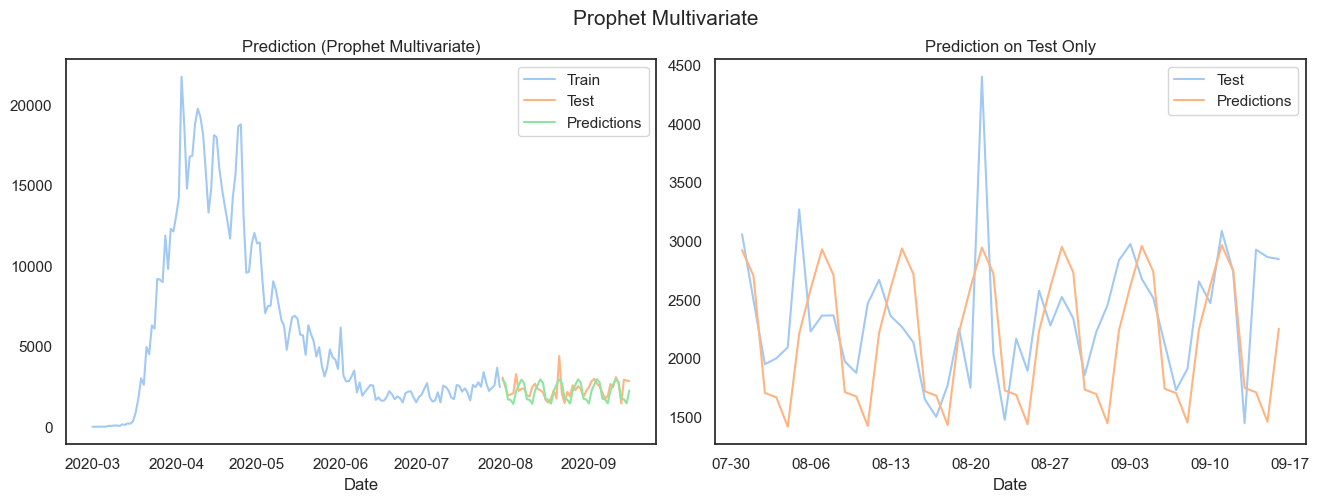

In [62]:
show_predictions('Prophet Multivariate')


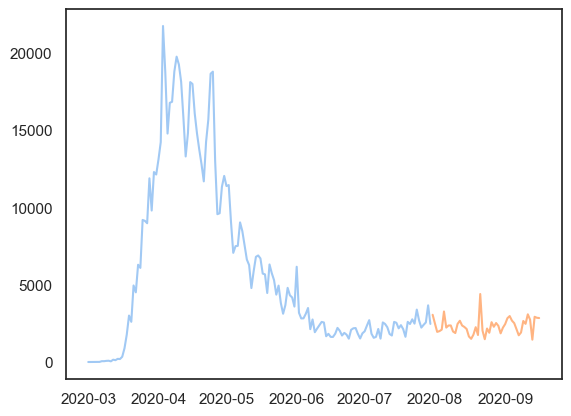

In [63]:

plt.plot(df_train_ne['date'], df_train_ne['confirmed'], label='Train')
hold = plt.plot(df_test_ne['date'], df_test_ne['confirmed'], label='Test')

plt.show()

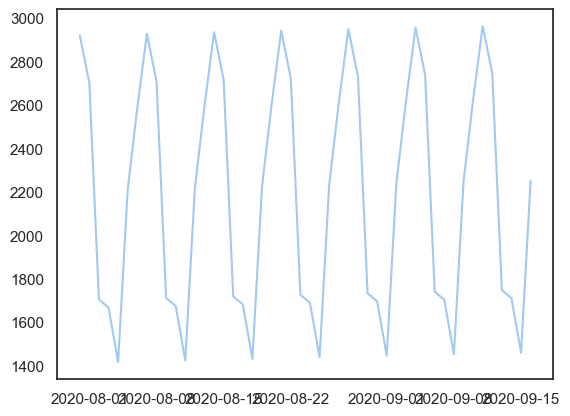

In [64]:
plt.plot(df_test_ne['date'], df_test_ne['Predictions'], label='Predictions')

In [65]:
df_test_ne['date']

0    2020-07-31
1    2020-08-01
2    2020-08-02
3    2020-08-03
4    2020-08-04
5    2020-08-05
6    2020-08-06
7    2020-08-07
8    2020-08-08
9    2020-08-09
10   2020-08-10
11   2020-08-11
12   2020-08-12
13   2020-08-13
14   2020-08-14
15   2020-08-15
16   2020-08-16
17   2020-08-17
18   2020-08-18
19   2020-08-19
20   2020-08-20
21   2020-08-21
22   2020-08-22
23   2020-08-23
24   2020-08-24
25   2020-08-25
26   2020-08-26
27   2020-08-27
28   2020-08-28
29   2020-08-29
30   2020-08-30
31   2020-08-31
32   2020-09-01
33   2020-09-02
34   2020-09-03
35   2020-09-04
36   2020-09-05
37   2020-09-06
38   2020-09-07
39   2020-09-08
40   2020-09-09
41   2020-09-10
42   2020-09-11
43   2020-09-12
44   2020-09-13
45   2020-09-14
46   2020-09-15
47   2020-09-16
Name: date, dtype: datetime64[ns]

In [66]:
df_test_ne.Predictions

0    2920.2549
1    2702.1520
2    1704.0214
3    1666.7940
4    1416.2418
5    2209.2942
6    2587.0754
7    2927.4321
8    2709.3291
9    1711.1985
10   1673.9711
11   1423.4189
12   2216.4714
13   2594.2526
14   2934.6092
15   2716.5063
16   1718.3756
17   1681.1483
18   1430.5961
19   2223.6485
20   2601.4297
21   2941.7864
22   2723.6834
23   1725.5528
24   1688.3254
25   1437.7732
26   2230.8257
27   2608.6069
28   2948.9635
29   2730.8605
30   1732.7299
31   1695.5026
32   1444.9504
33   2238.0028
34   2615.7840
35   2956.1407
36   2738.0377
37   1739.9071
38   1702.6797
39   1452.1275
40   2245.1799
41   2622.9612
42   2963.3178
43   2745.2148
44   1747.0842
45   1709.8569
46   1459.3047
47   2252.3571
Name: Predictions, dtype: float64